## Impact of Background Color

3 other dimensions:

->Font Size: 18

->Blur Level: 0

->word count: all 3

3 bg colors: white, light yellow, slate grey

word count: 40-60, 110-130, 180-200

for each word count:

->3 bg colors


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from nltk.translate.bleu_score import sentence_bleu
import warnings
warnings.filterwarnings("ignore")



## BackGround Color Datset Functions

In [3]:
# Function to filter data for background color analysis
def filter_background_color_data(df, base_font_size, base_blur_level, background_colors, word_count_order):
    filtered_df = df[
        (df['Font Size'] == base_font_size) &
        (df['Blur Level'] == base_blur_level) &
        (df['Background Color'].isin(background_colors)) &
        (df['Word Count Range'].isin(word_count_order))
    ]
    return filtered_df

# Function to analyze background color impact on WER
def analyze_background_color_impact(df, word_count_order, language_name, background_colors):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_df = df[df['Word Count Range'] == word_count]

        # Calculate average WER for each background color
        avg_wer = wc_df.groupby('Background Color')['WER'].mean().reset_index()

        # Reorder the background colors as specified
        avg_wer['Background Color'] = pd.Categorical(avg_wer['Background Color'], categories=background_colors, ordered=True)
        avg_wer = avg_wer.sort_values('Background Color')

        # Plotting
        plt.figure(figsize=(14, 8))  # Larger figure size for better presentation

        # Create a bar plot
        sns.barplot(
            x=avg_wer['Background Color'],
            y=avg_wer['WER'],
            palette='Set2',  # Use a vibrant palette for background colors
            edgecolor='black'
        )

        # Add labels, title, and grid
        plt.title(
            f'Impact of Background Color on WER for Word Count {word_count} ({language_name})',
            fontsize=22,
            fontweight='bold',
            pad=20
        )
        plt.xlabel('Background Color', fontsize=18, fontweight='bold')
        plt.ylabel('Average WER', fontsize=18, fontweight='bold')
        plt.xticks(fontsize=14, fontweight='bold')
        plt.yticks(fontsize=14, fontweight='bold')

        # Add gridlines for better readability
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

        # Ensure tight layout
        plt.tight_layout()
        plt.show()


## URDU Evaluation

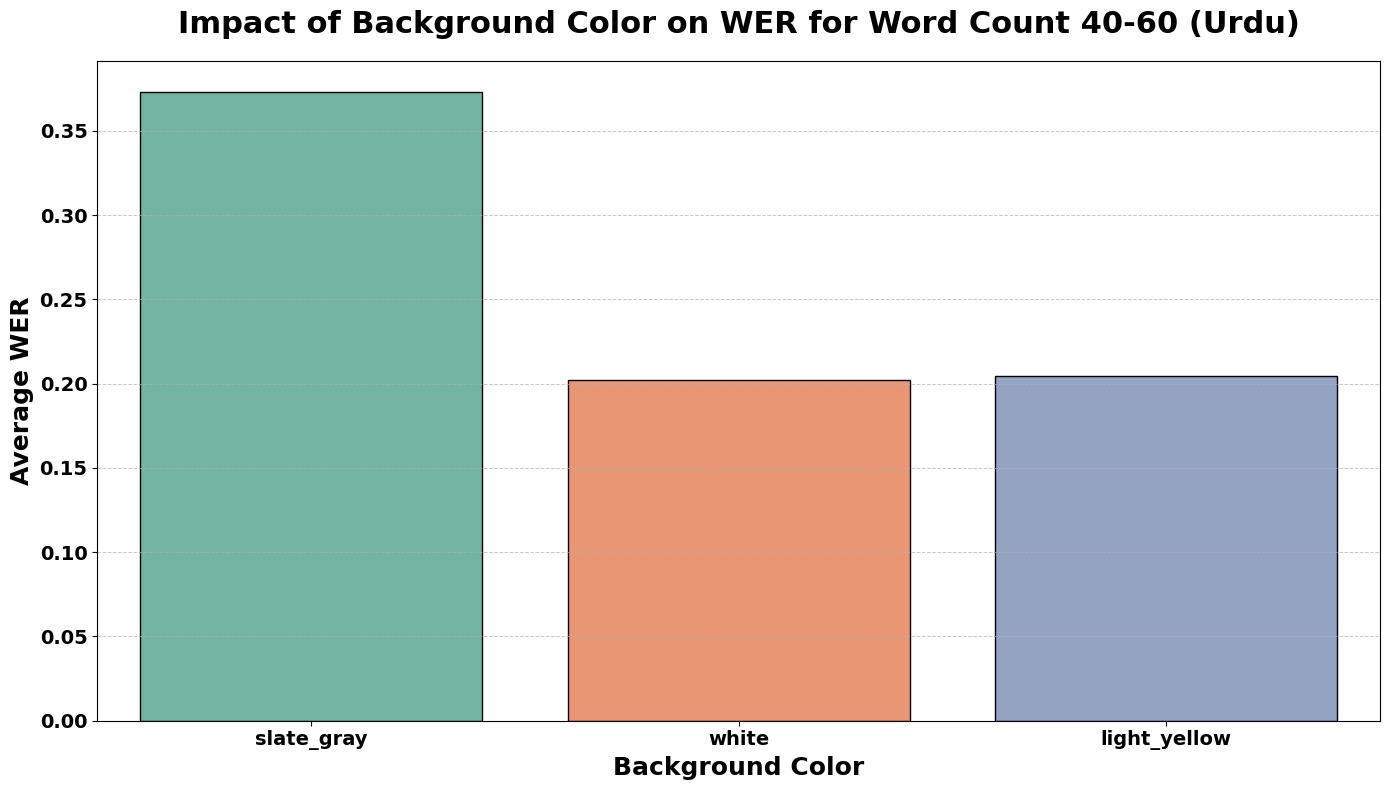

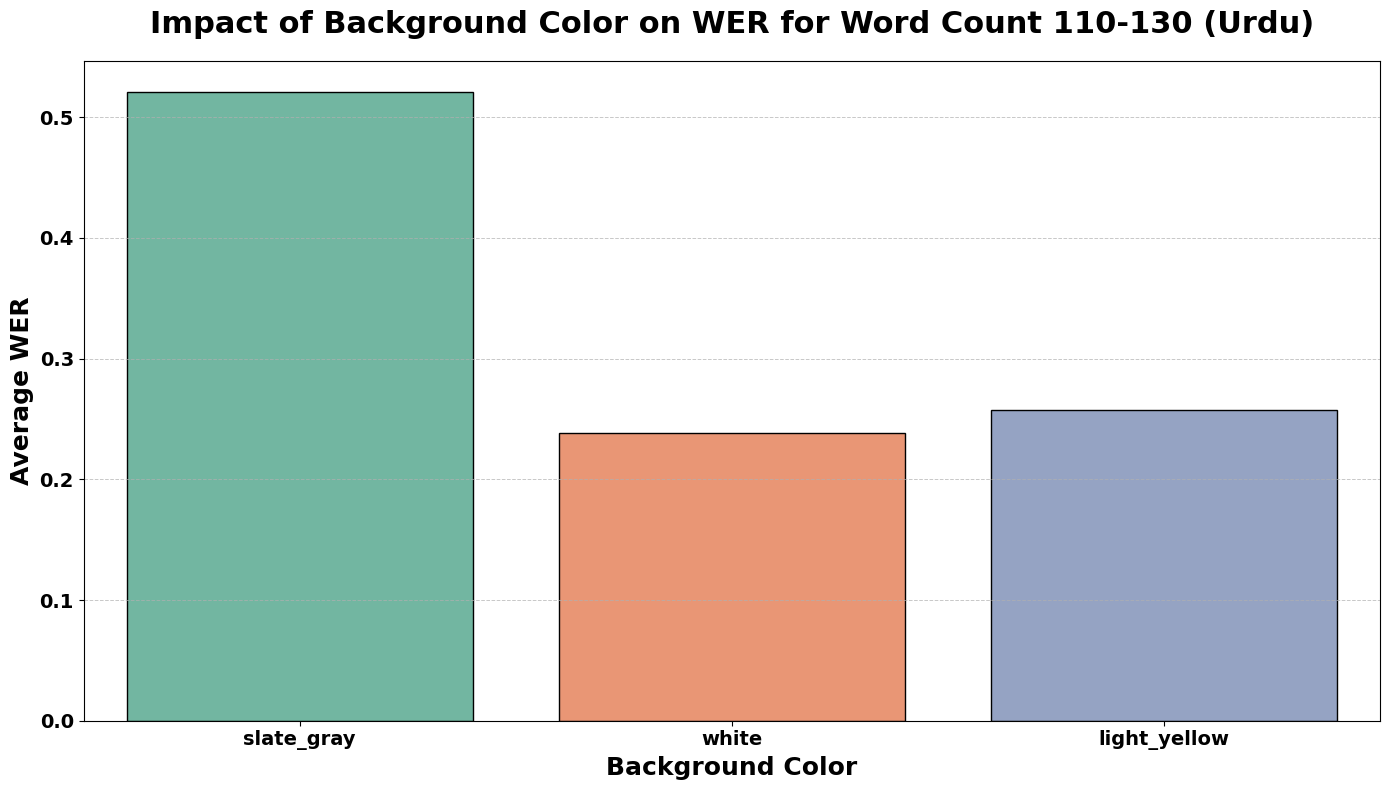

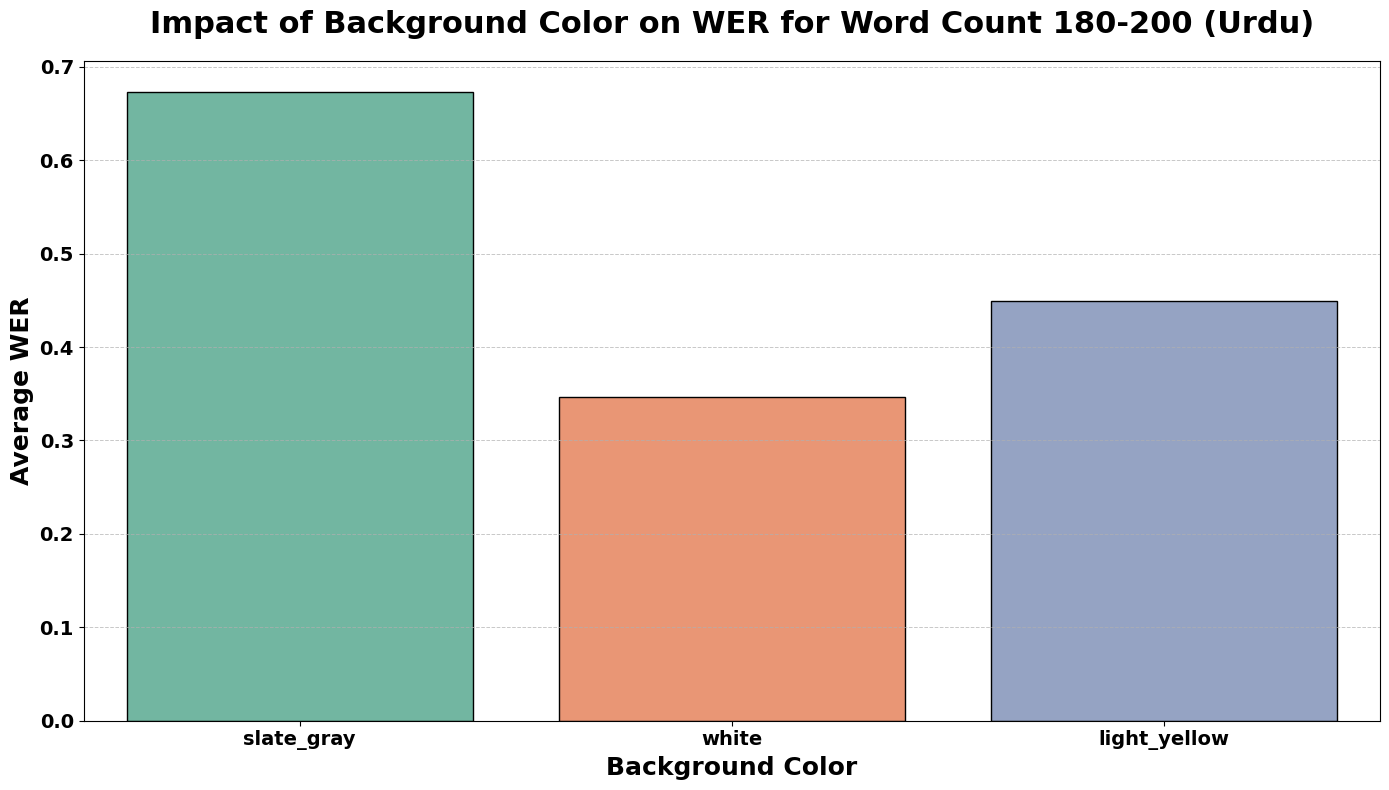

In [4]:
# File path
urdu_file_path = 'urdu_inferenced_dataset_with_metrics.csv'
urdu_df = pd.read_csv(urdu_file_path)

# Define filtering conditions
base_font_size = 18
base_blur_level = 0
background_colors = ['slate_gray', 'white', 'light_yellow']
word_count_order = ['40-60', '110-130', '180-200']

# Filter the data
filtered_urdu_df = filter_background_color_data(urdu_df, base_font_size, base_blur_level, background_colors, word_count_order)

# Analyze background color impact on WER
analyze_background_color_impact(filtered_urdu_df, word_count_order, "Urdu", background_colors)


## ENGISH Evaluation

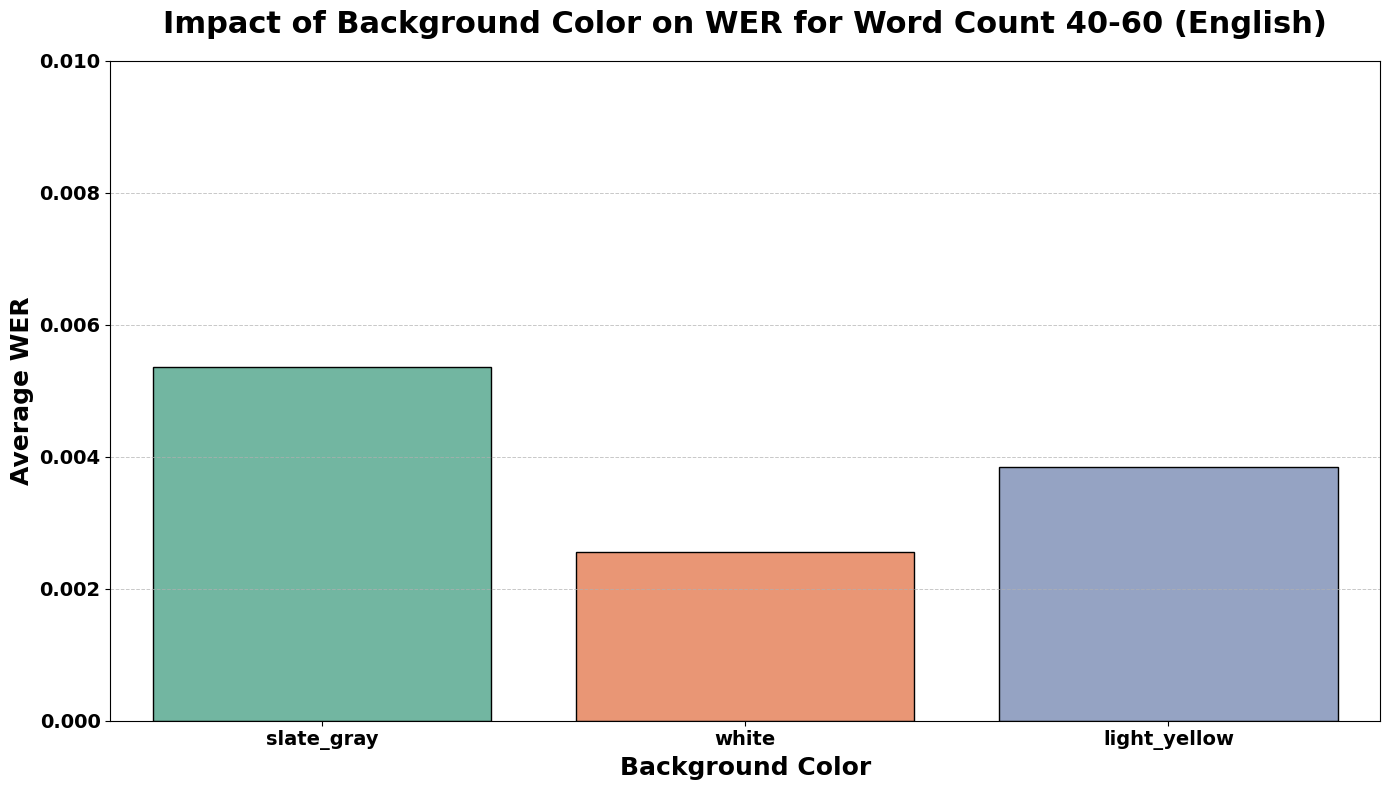

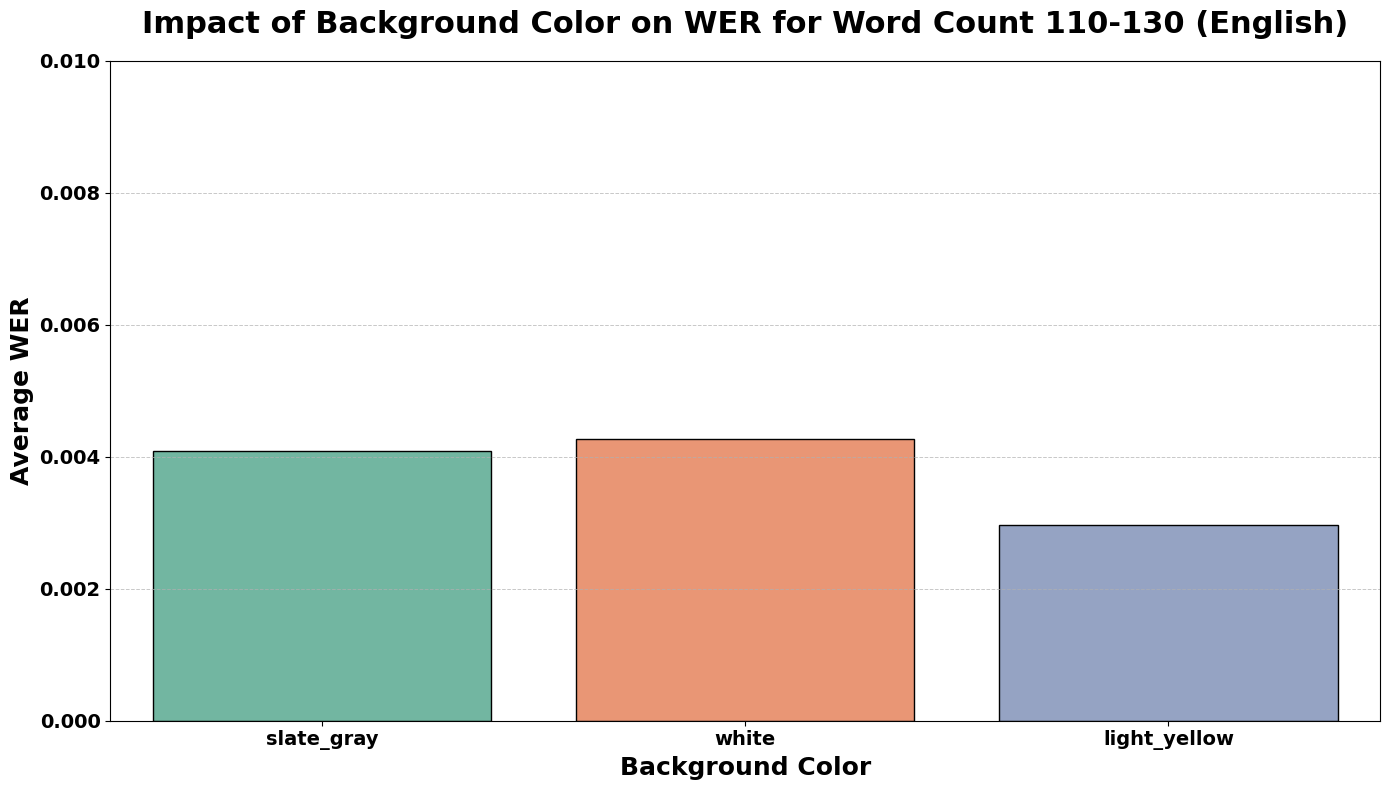

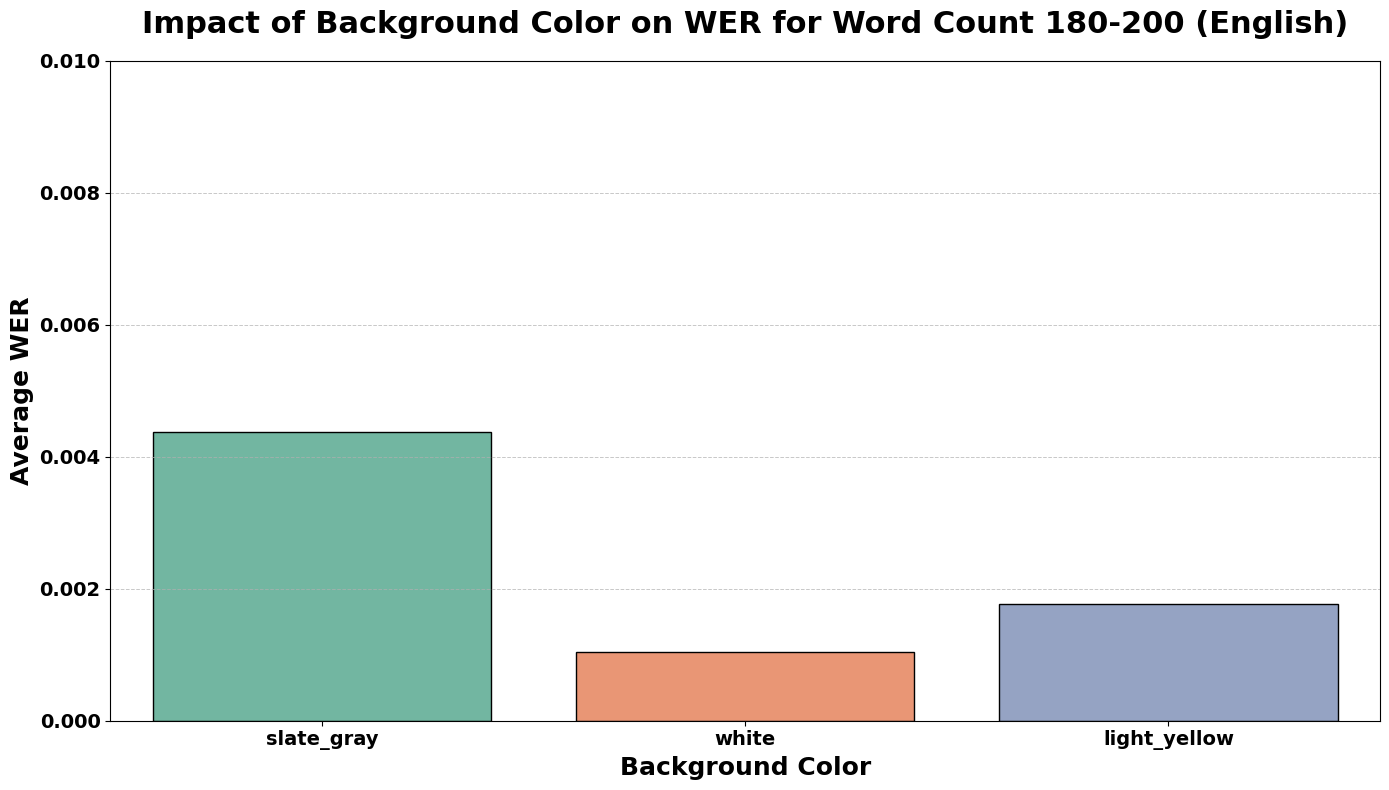

In [5]:
# Function to analyze background color impact on WER
def analyze_background_color_impact_english(df, word_count_order, language_name, background_colors, y_max = 0.01):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_df = df[df['Word Count Range'] == word_count]

        # Calculate average WER for each background color
        avg_wer = wc_df.groupby('Background Color')['WER'].mean().reset_index()

        # Reorder the background colors as specified
        avg_wer['Background Color'] = pd.Categorical(avg_wer['Background Color'], categories=background_colors, ordered=True)
        avg_wer = avg_wer.sort_values('Background Color')

        # Plotting
        plt.figure(figsize=(14, 8))  # Larger figure size for better presentation

        # Create a bar plot
        sns.barplot(
            x=avg_wer['Background Color'],
            y=avg_wer['WER'],
            palette='Set2',  # Use a vibrant palette for background colors
            edgecolor='black'
        )

        # Add labels, title, and grid
        plt.title(
            f'Impact of Background Color on WER for Word Count {word_count} ({language_name})',
            fontsize=22,
            fontweight='bold',
            pad=20
        )
        plt.xlabel('Background Color', fontsize=18, fontweight='bold')
        plt.ylabel('Average WER', fontsize=18, fontweight='bold')
        plt.xticks(fontsize=14, fontweight='bold')
        plt.yticks(fontsize=14, fontweight='bold')
        plt.ylim(0, y_max)  # Set the custom Y-axis maximum value


        # Add gridlines for better readability
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

        # Ensure tight layout
        plt.tight_layout()
        plt.show()

# File path
english_file_path = 'english_inferenced_dataset_with_metrics.csv'
english_df = pd.read_csv(english_file_path)

# Filter the data
filtered_english_df = filter_background_color_data(english_df, base_font_size, base_blur_level, background_colors, word_count_order)

# Analyze background color impact on WER
analyze_background_color_impact_english(filtered_english_df, word_count_order, "English", background_colors)


## TAJIK Evaluation

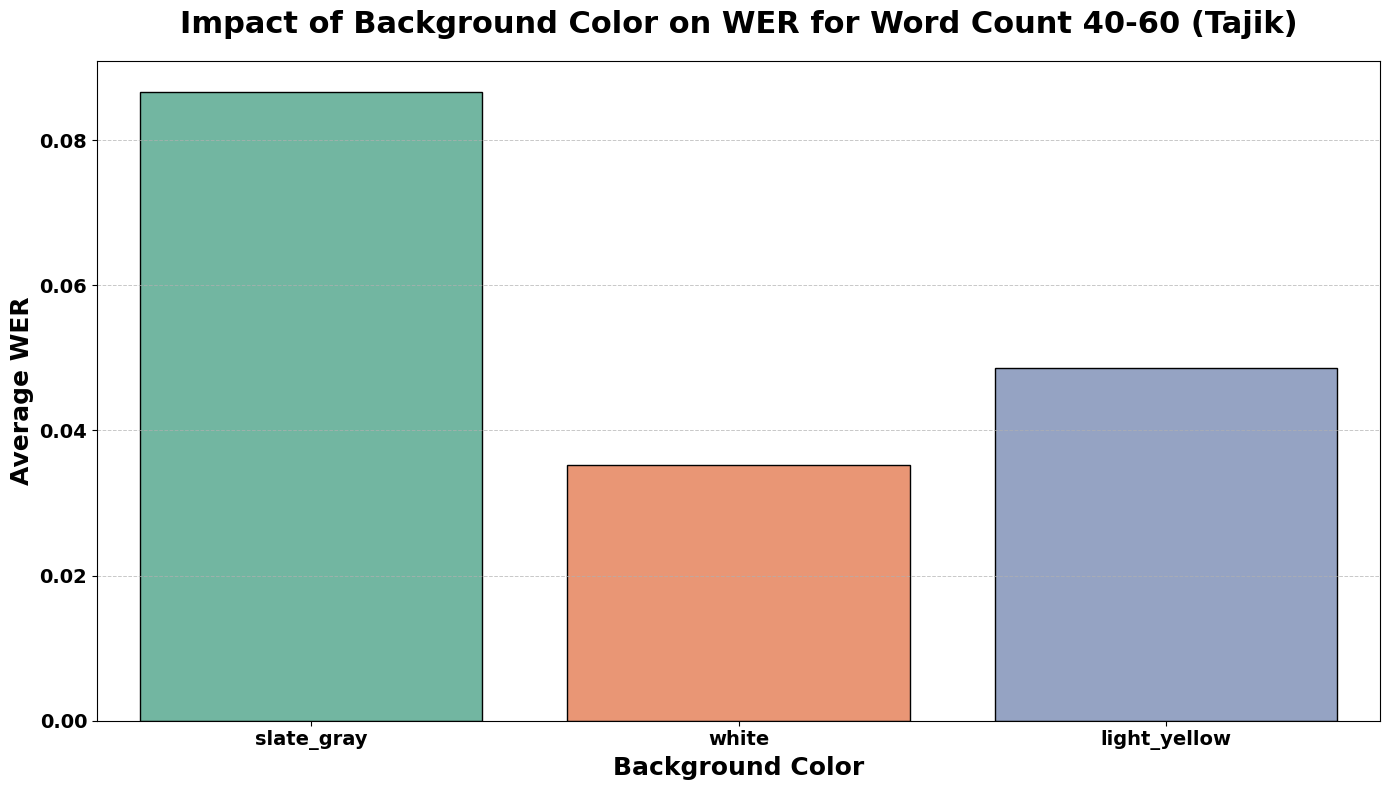

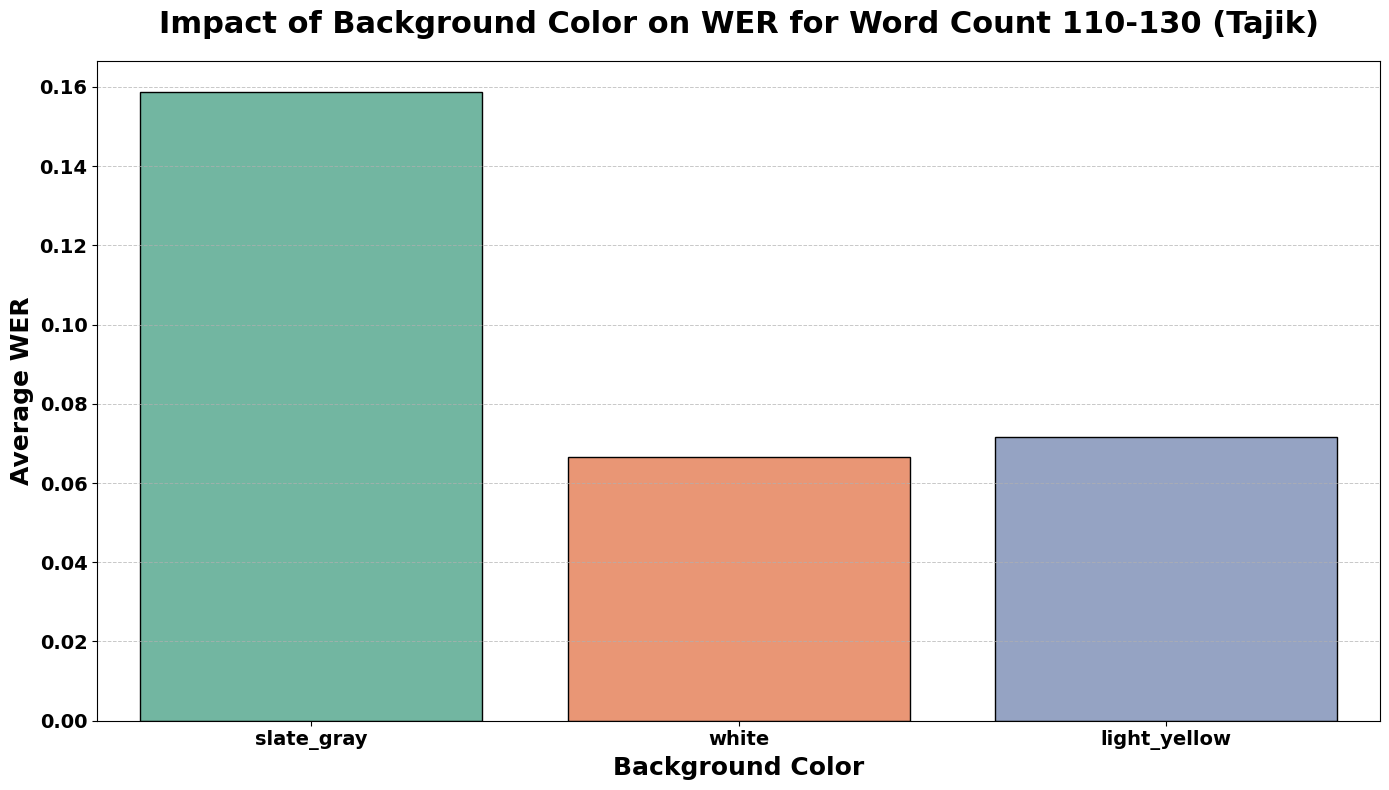

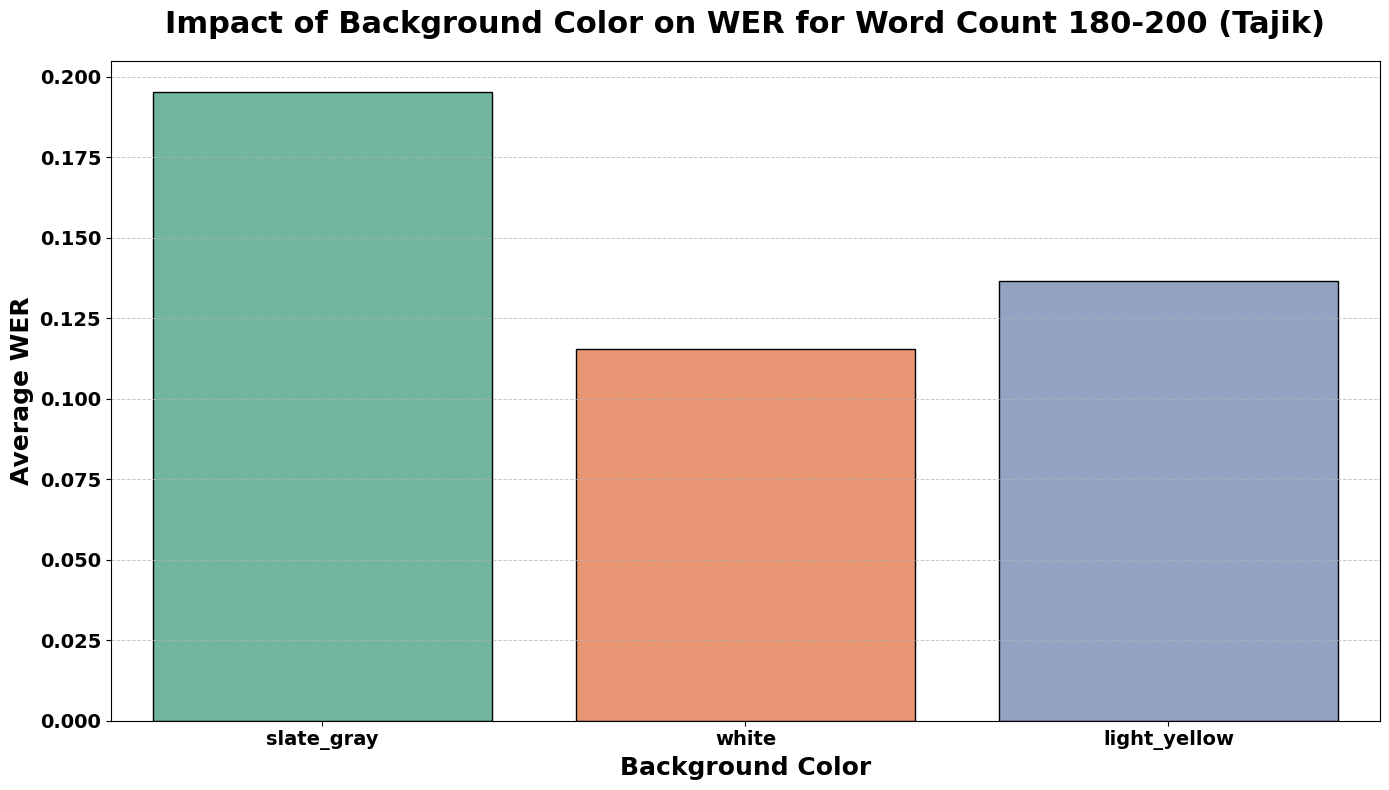

In [6]:
# File path
tajik_file_path = 'tajik_inferenced_dataset_with_metrics.csv'
tajik_df = pd.read_csv(tajik_file_path)

# Filter the data
filtered_tajik_df = filter_background_color_data(tajik_df, base_font_size, base_blur_level, background_colors, word_count_order)

# Analyze background color impact on WER
analyze_background_color_impact(filtered_tajik_df, word_count_order, "Tajik", background_colors)


## ALBANIAN Evaluation

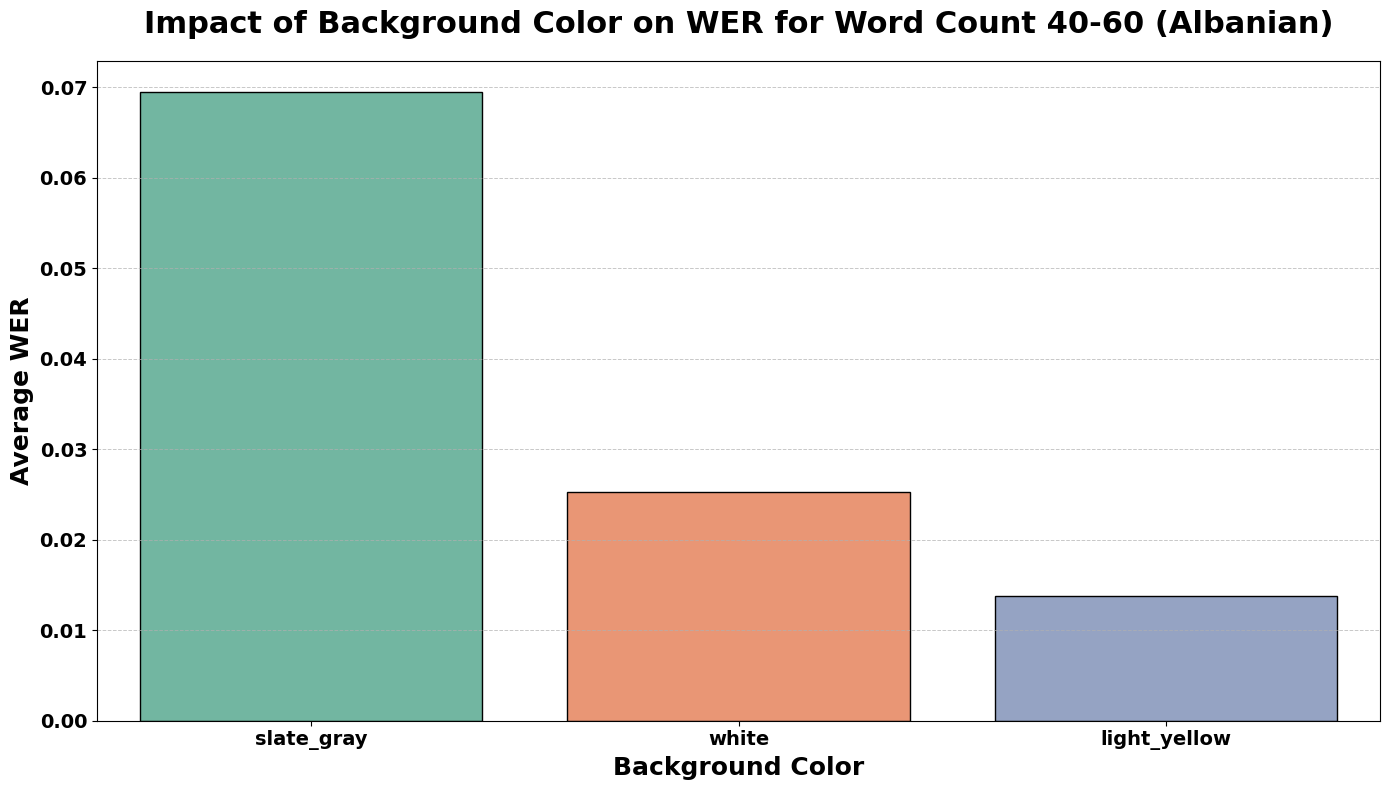

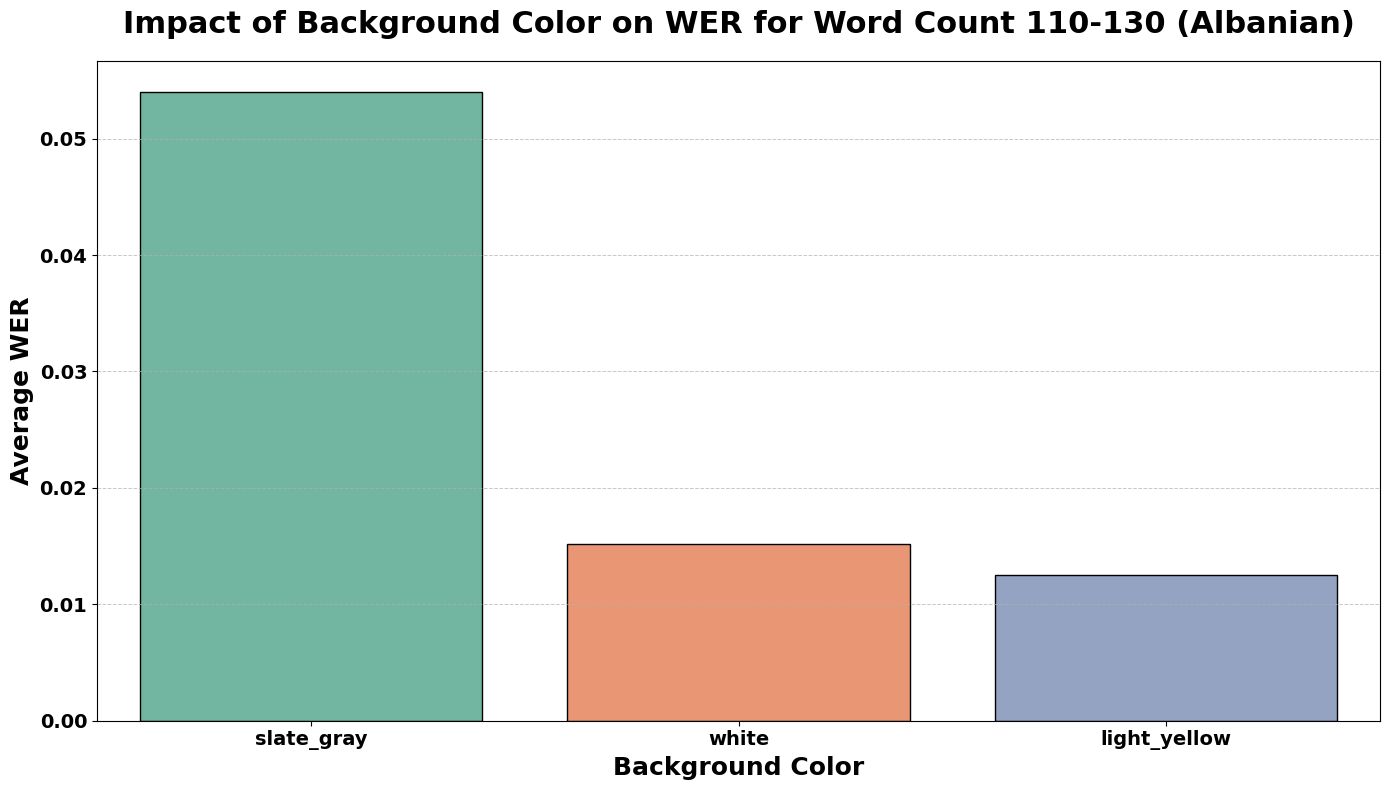

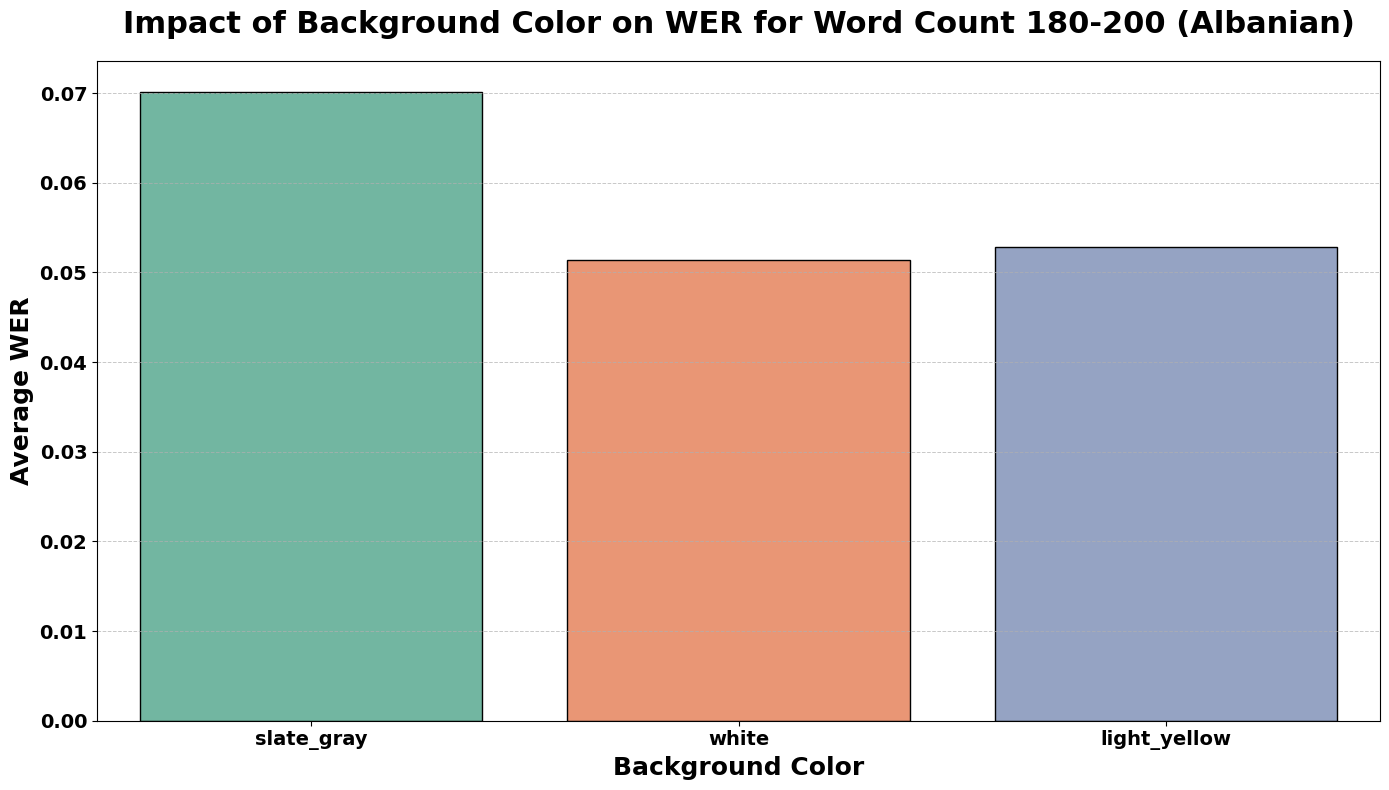

In [7]:
# File path
albanian_file_path = 'albanian_inferenced_dataset_with_metrics.csv'
albanian_df = pd.read_csv(albanian_file_path)

# Filter the data
filtered_albanian_df = filter_background_color_data(albanian_df, base_font_size, base_blur_level, background_colors, word_count_order)

# Analyze background color impact on WER
analyze_background_color_impact(filtered_albanian_df, word_count_order, "Albanian", background_colors)


## Combining Results

In [8]:
# Combine results from all languages into a single DataFrame for grouped bar plots
combined_results = []

# Helper function to append results to the combined list
def append_language_results_bg(filtered_df, word_count_order, language_name, background_colors):
    for word_count in word_count_order:
        wc_df = filtered_df[filtered_df['Word Count Range'] == word_count]
        avg_wer = wc_df.groupby('Background Color')['WER'].mean().reset_index()
        avg_wer['Language'] = language_name
        avg_wer['Word Count Range'] = word_count
        avg_wer['Background Color'] = pd.Categorical(avg_wer['Background Color'], categories=background_colors, ordered=True)
        avg_wer = avg_wer.sort_values('Background Color')
        combined_results.append(avg_wer)

# Append results for all languages
append_language_results_bg(filtered_urdu_df, word_count_order, "Urdu", background_colors)
append_language_results_bg(filtered_tajik_df, word_count_order, "Tajik", background_colors)
append_language_results_bg(filtered_albanian_df, word_count_order, "Albanian", background_colors)
append_language_results_bg(filtered_english_df, word_count_order, "English", background_colors)


# Combine into a single DataFrame
combined_bg_df = pd.concat(combined_results, ignore_index=True)
print("Combined results DataFrame for Background Color created.")


Combined results DataFrame for Background Color created.


## Grouped Bar Plot (All Word Counts Combined)

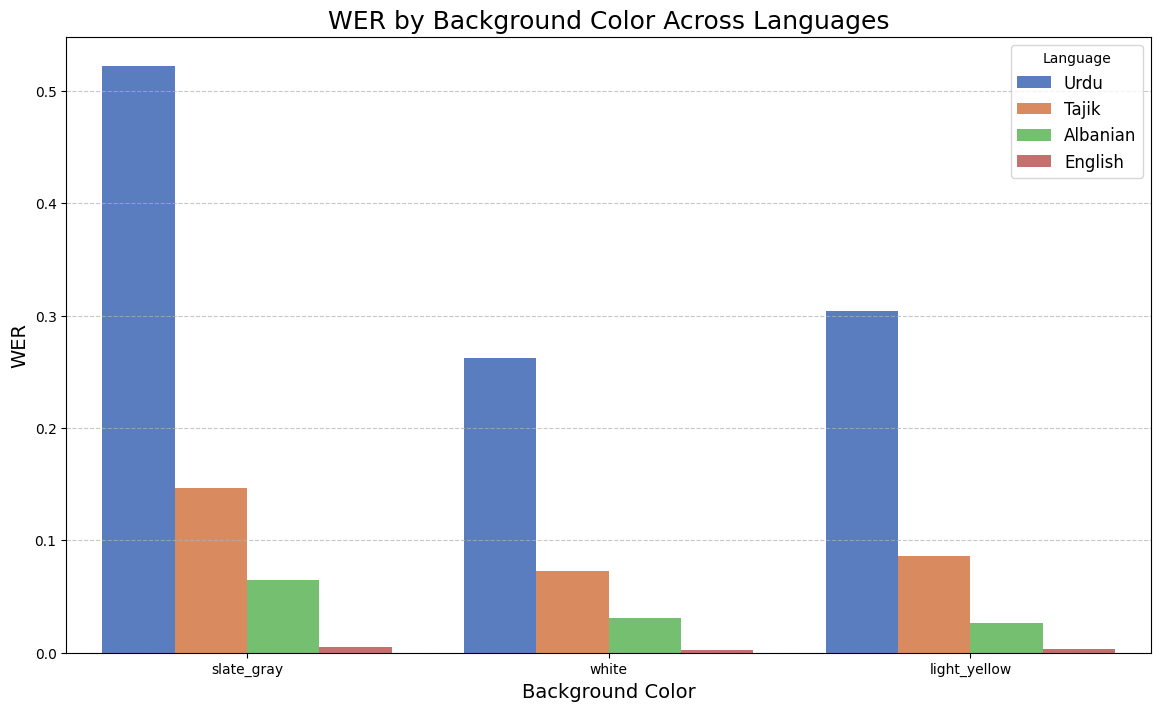

In [9]:
# Grouped bar plot: WER vs Background Color for each language
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(14, 8))
sns.barplot(data=combined_bg_df, x='Background Color', y='WER', hue='Language', ci=None, palette='muted')
plt.title('WER by Background Color Across Languages', fontsize=18)
plt.xlabel('Background Color', fontsize=14)
plt.ylabel('WER', fontsize=14)
plt.legend(title='Language', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Grouped Bar Plots (For Each Word Count)

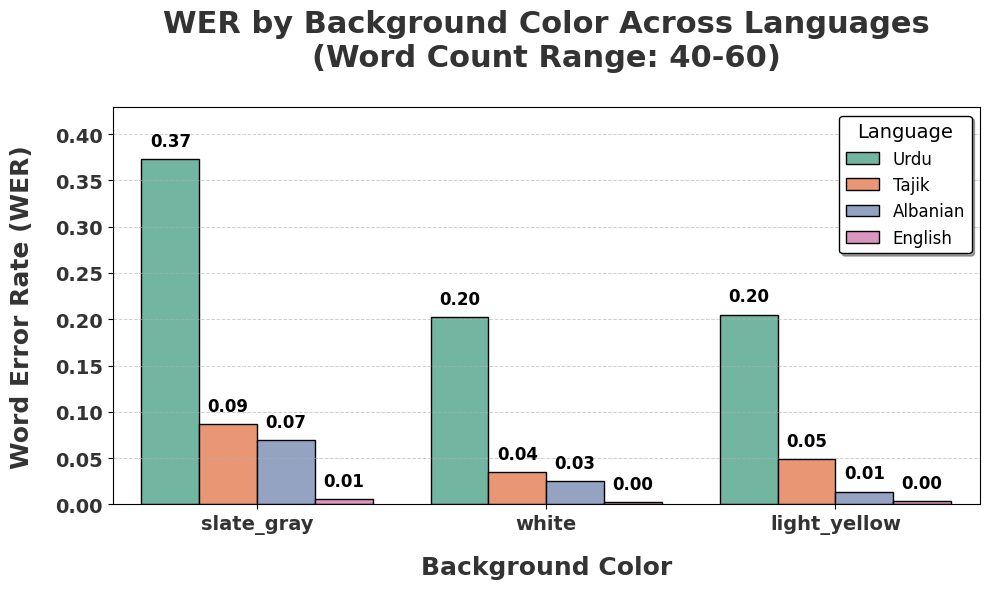

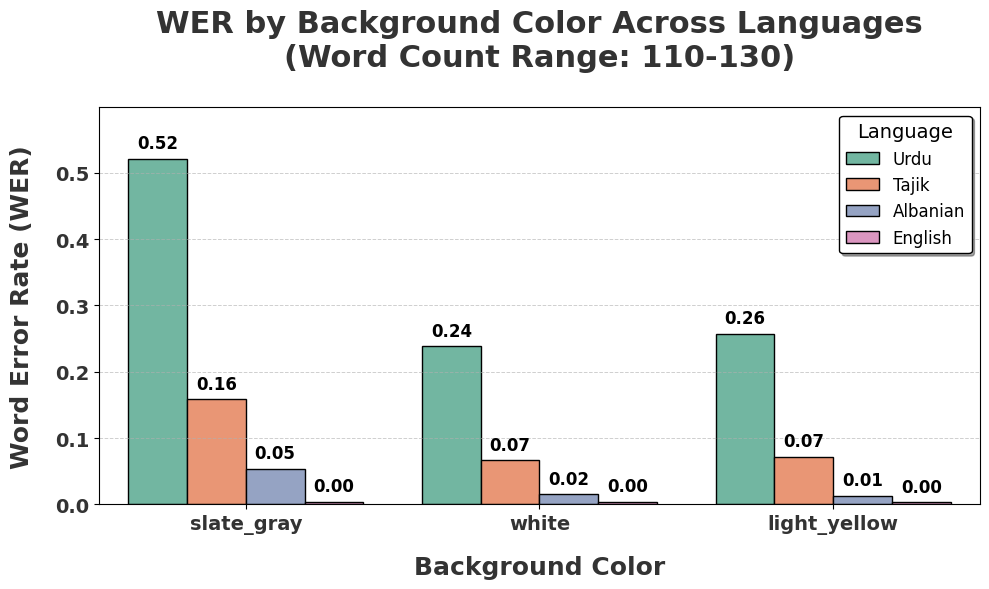

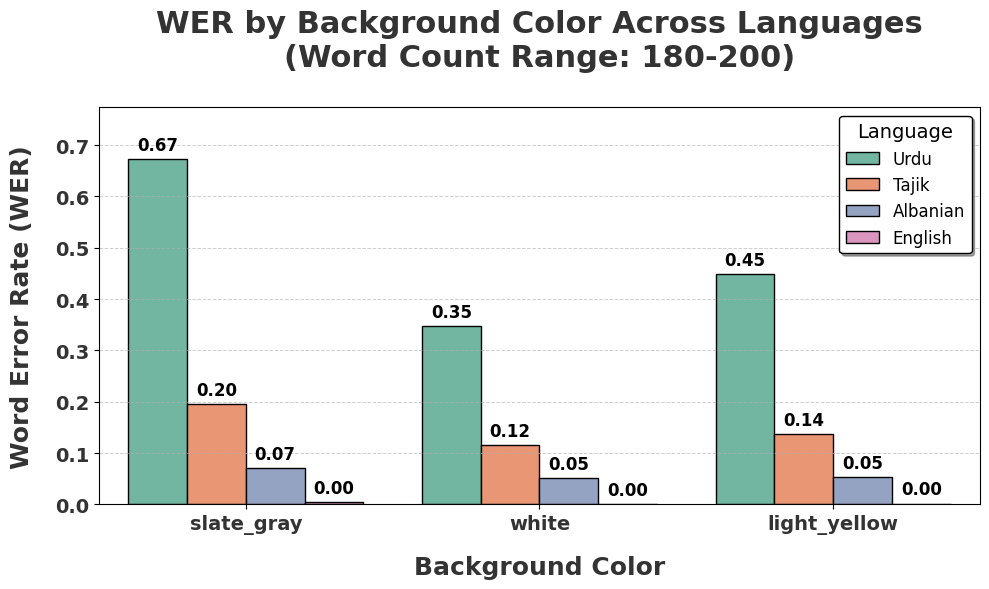

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped Bar Plot for WER by Background Color
def plot_grouped_bar_wer_bg(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(10, 6))  # Larger figure size for better presentation

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Background Color',
            y='WER',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'WER by Background Color Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=30,
            color='#333333'
        )
        plt.xlabel('Background Color', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper right',
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,
            shadow=True
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['WER'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for WER
plot_grouped_bar_wer_bg(combined_bg_df, word_count_order)


<h2> GROUPED BAR PLOT FOR CER <h2>

In [11]:
# Combine results from all languages into a single DataFrame for grouped bar plots
combined_results_cer_bg = []

# Helper function to append results to the combined list
def append_language_results_bg_cer(filtered_df, word_count_order, language_name, background_colors):
    for word_count in word_count_order:
        wc_df = filtered_df[filtered_df['Word Count Range'] == word_count]
        avg_cer = wc_df.groupby('Background Color')['CER'].mean().reset_index()
        avg_cer['Language'] = language_name
        avg_cer['Word Count Range'] = word_count
        avg_cer['Background Color'] = pd.Categorical(avg_cer['Background Color'], categories=background_colors, ordered=True)
        avg_cer = avg_cer.sort_values('Background Color')
        combined_results_cer_bg.append(avg_cer)

# Append results for all languages
append_language_results_bg_cer(filtered_urdu_df, word_count_order, "Urdu", background_colors)
append_language_results_bg_cer(filtered_tajik_df, word_count_order, "Tajik", background_colors)
append_language_results_bg_cer(filtered_albanian_df, word_count_order, "Albanian", background_colors)
append_language_results_bg_cer(filtered_english_df, word_count_order, "English", background_colors)

# Combine into a single DataFrame
combined_cer_bg_df = pd.concat(combined_results_cer_bg, ignore_index=True)
print("Combined results DataFrame for Background Color (CER) created.")

Combined results DataFrame for Background Color (CER) created.


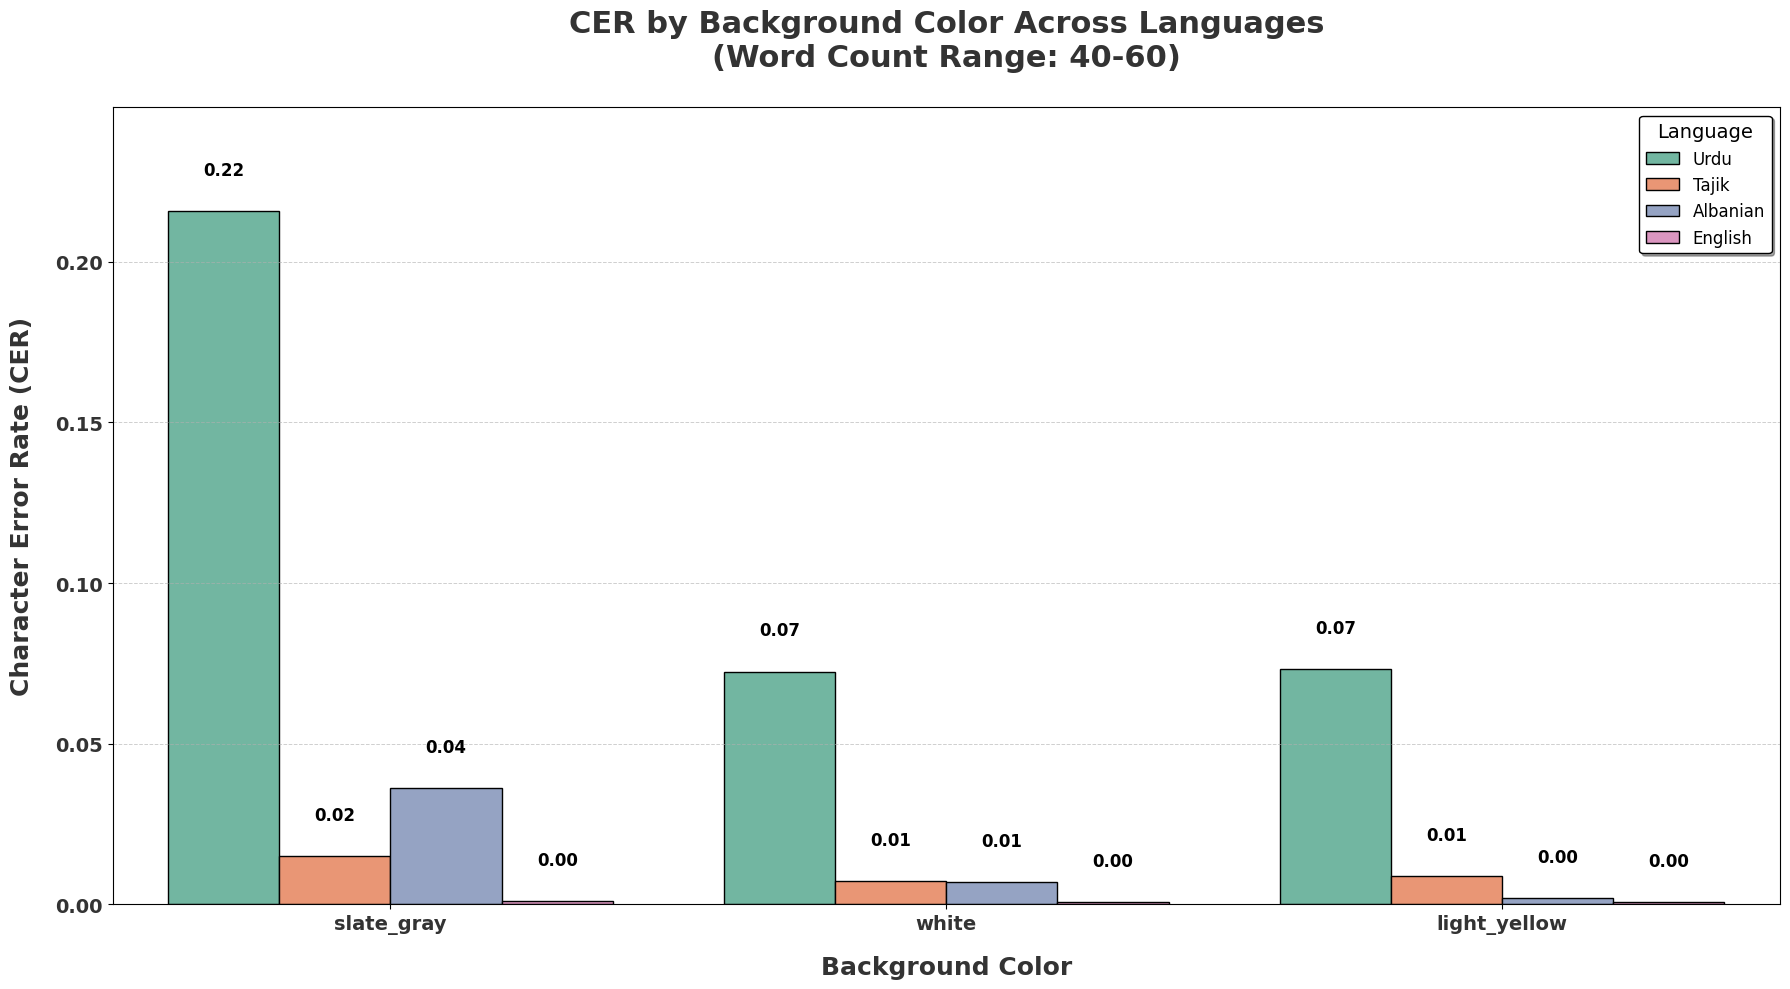

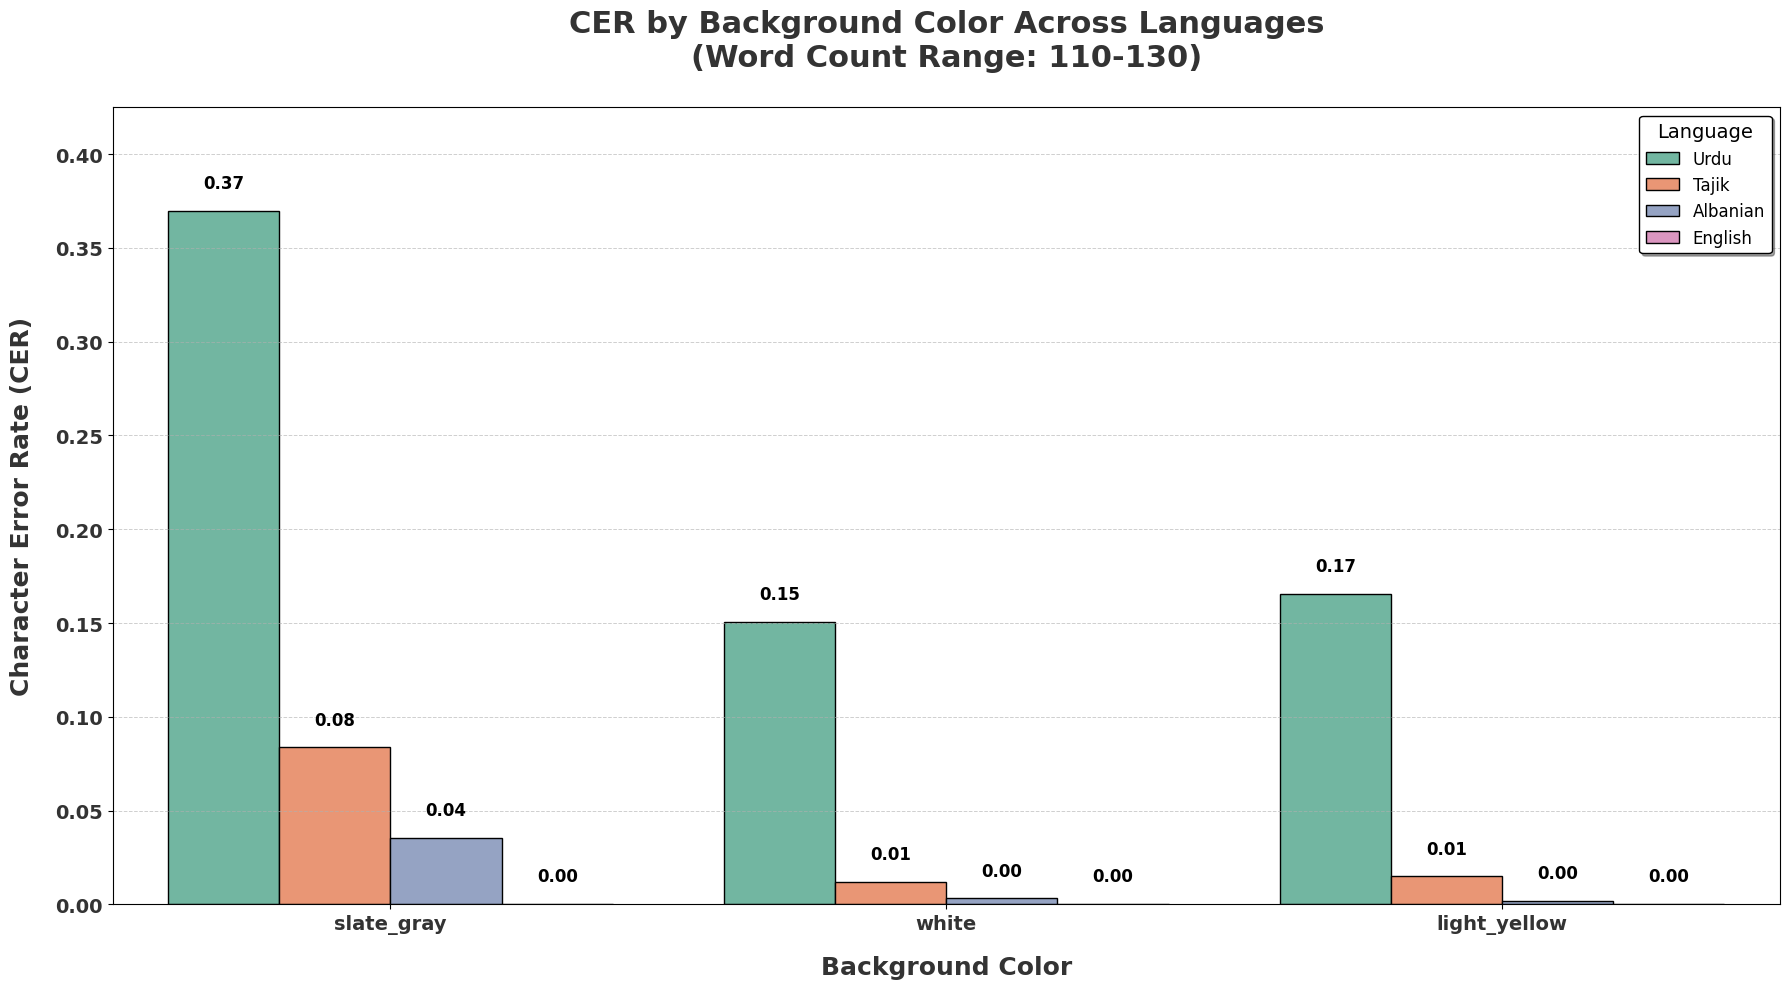

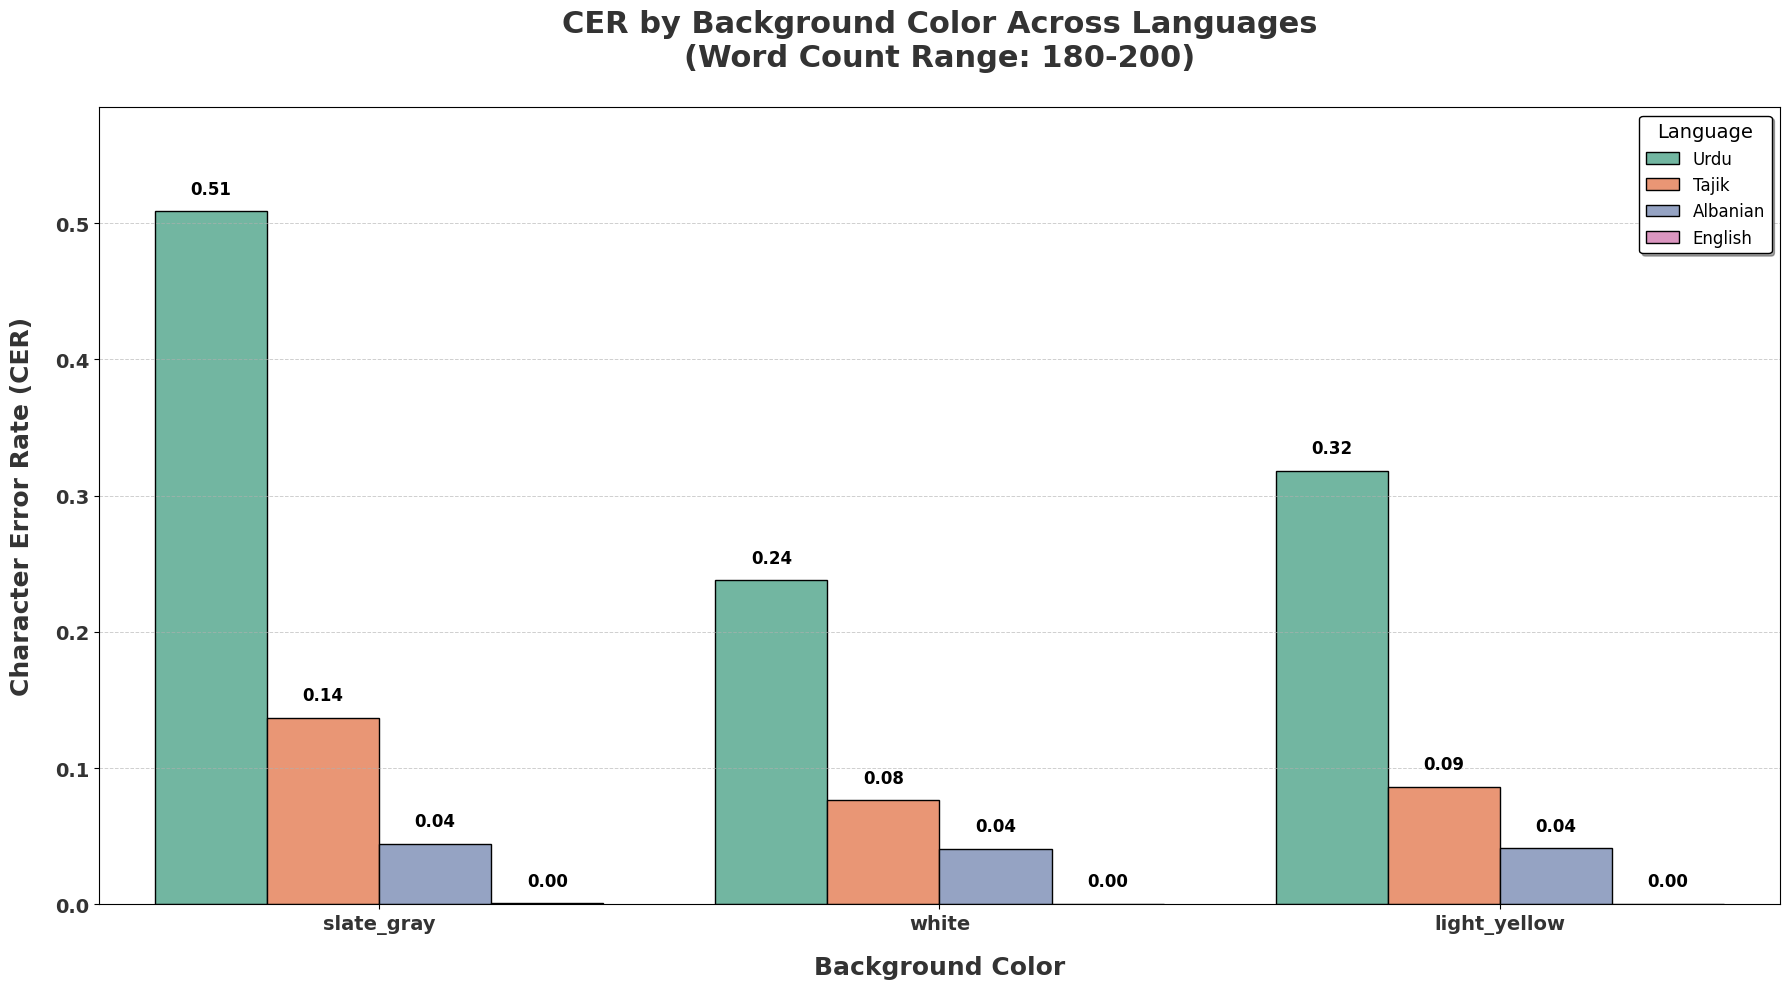

In [12]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped Bar Plot for CER by Background Color
def plot_grouped_bar_cer_bg(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))  # Larger figure size for better presentation

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Background Color',
            y='CER',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'CER by Background Color Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=30,
            color='#333333'
        )
        plt.xlabel('Background Color', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('Character Error Rate (CER)', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper right',
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,
            shadow=True
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['CER'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for CER
plot_grouped_bar_cer_bg(combined_cer_bg_df, word_count_order)

## Line Plots (For Each Word Count)

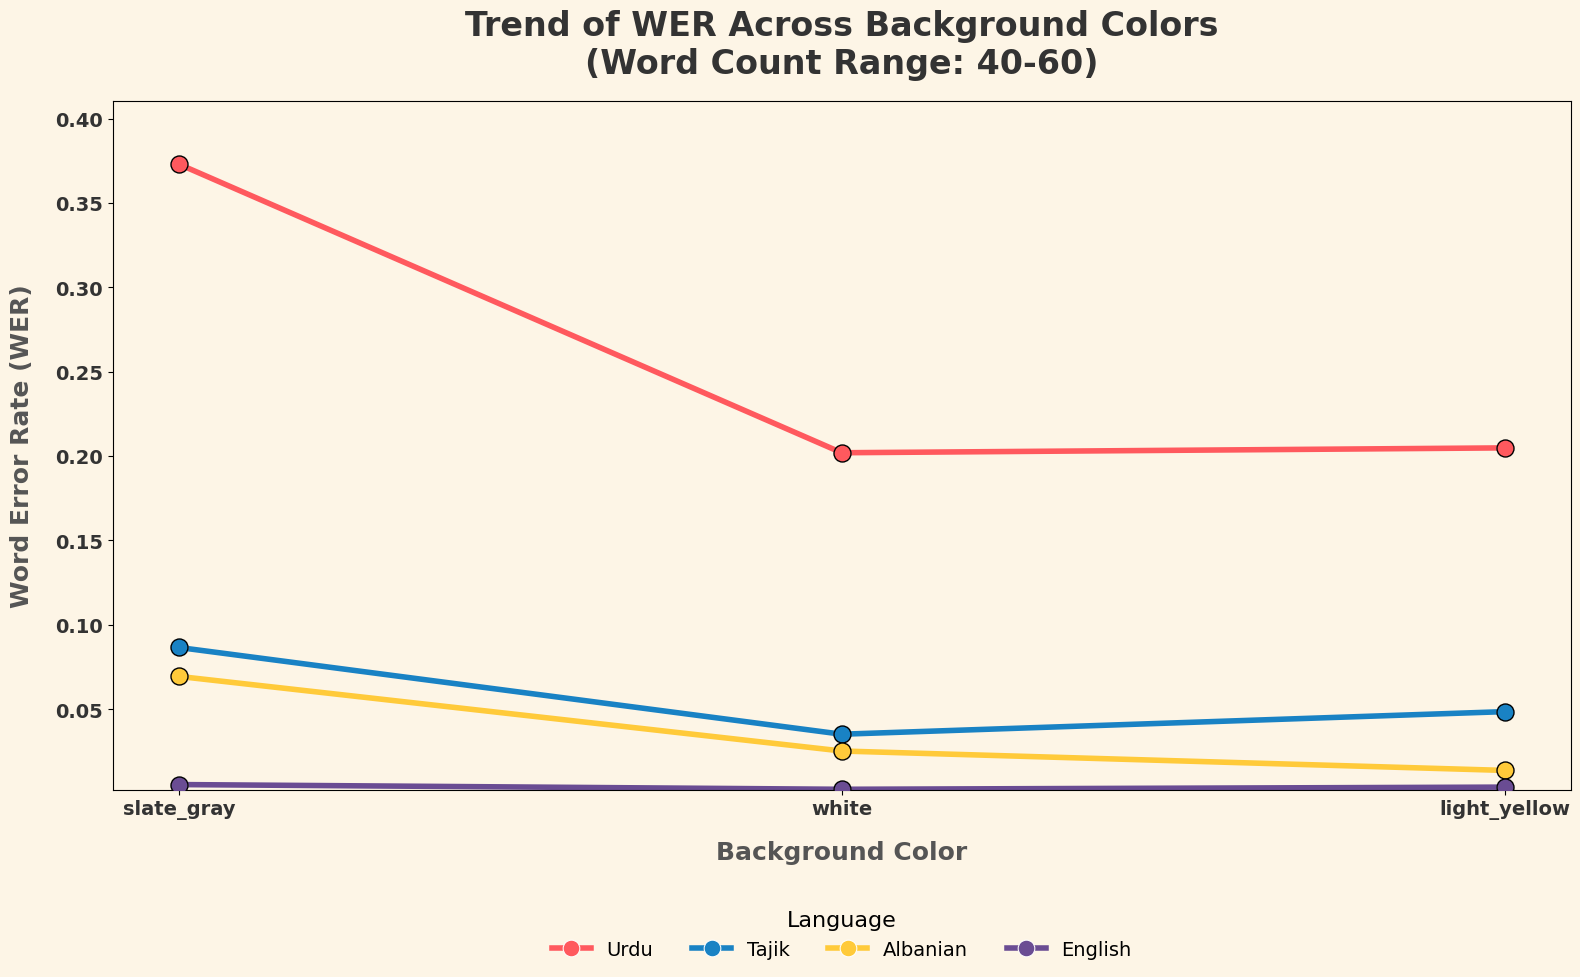

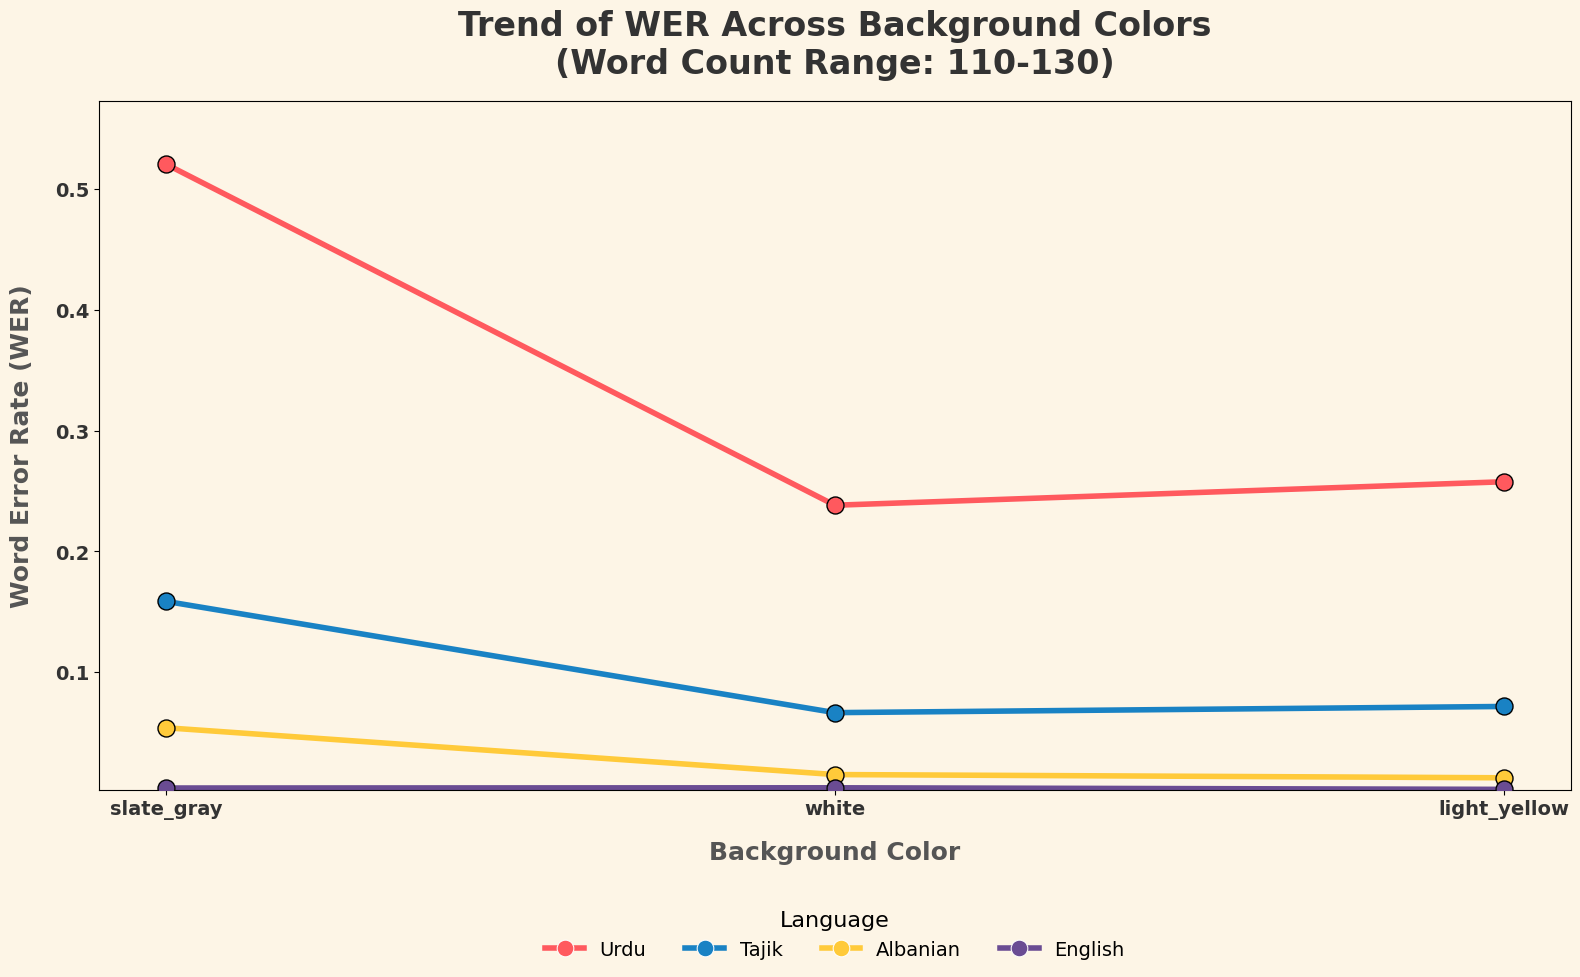

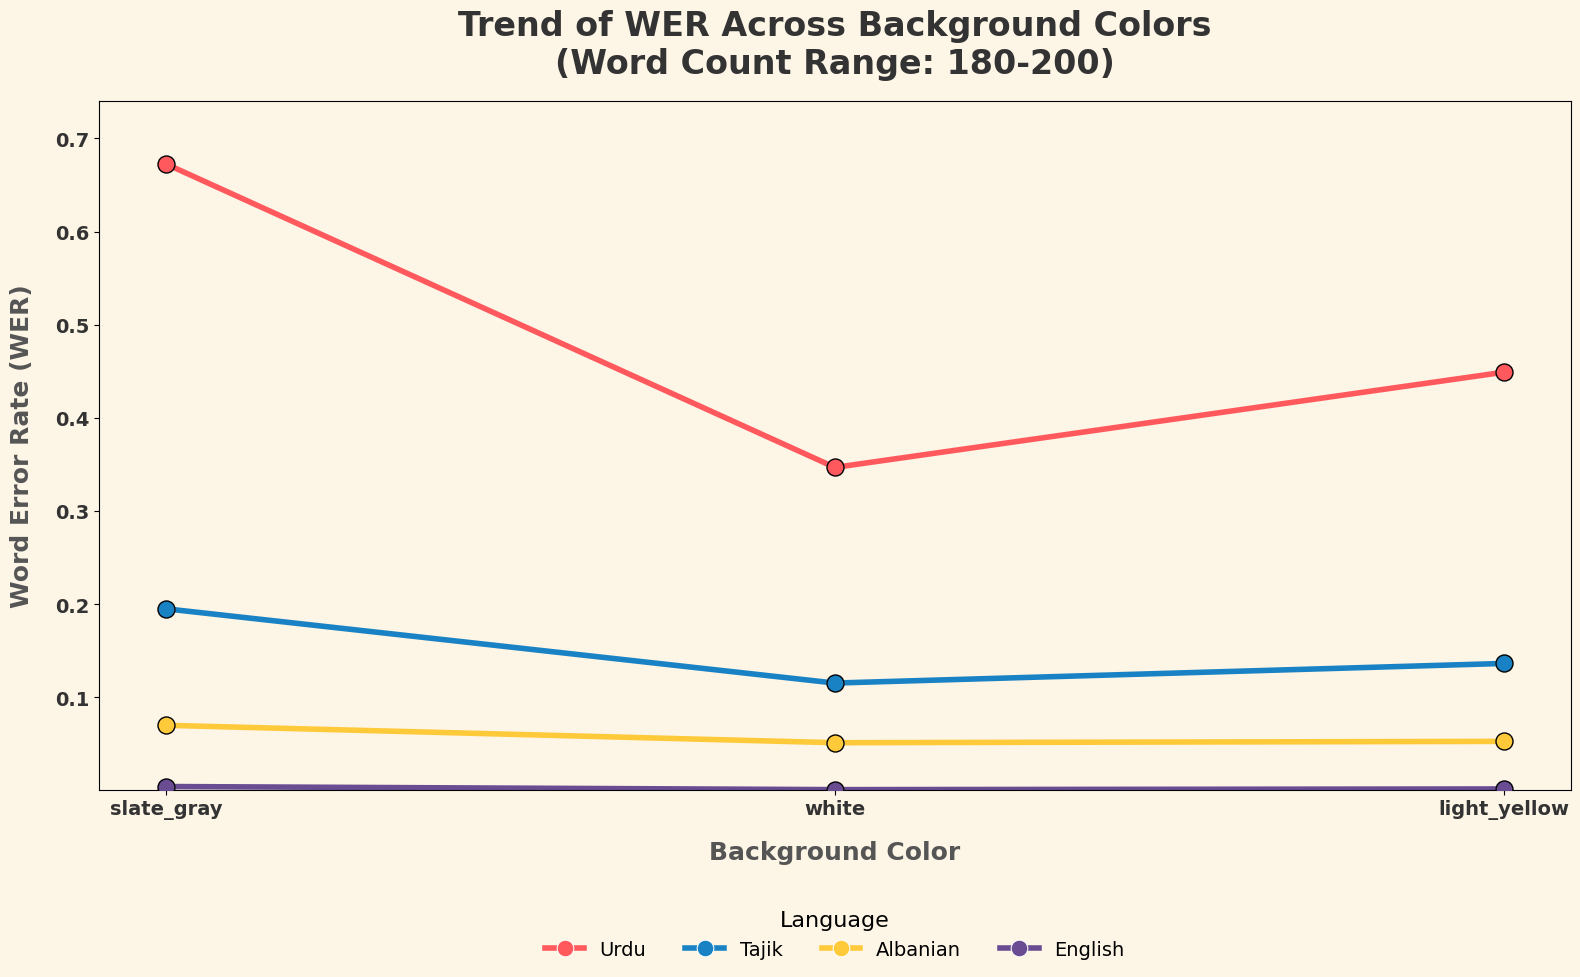

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced Line Plot for WER Trends Across Background Colors
def plot_line_wer_bg_infographic(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(16, 10))  # Larger figure for infographic presentation

        # Filter data for the specific word count range
        wc_combined_bg_df = df[df['Word Count Range'] == word_count]

        # Create the line plot
        sns.lineplot(
            data=wc_combined_bg_df,
            x='Background Color',
            y='WER',
            hue='Language',
            marker='o',
            palette=['#FF595E', '#1982C4', '#FFCA3A', '#6A4C93'],  # Vibrant and distinct colors
            linewidth=4,  # Thicker lines
            markersize=12  # Larger markers
        )

        # Customize title and labels
        plt.title(
            f'Trend of WER Across Background Colors\n(Word Count Range: {word_count})',
            fontsize=24,
            fontweight='bold',
            color='#333333',
            pad=20
        )
        plt.xlabel('Background Color', fontsize=18, labelpad=15, fontweight='bold', color='#555555')
        plt.ylabel('Word Error Rate (WER)', fontsize=18, labelpad=15, fontweight='bold', color='#555555')

        # Enhance legend
        plt.legend(
            title='Language',
            title_fontsize=16,
            fontsize=14,
            loc='upper center',
            bbox_to_anchor=(0.5, -0.15),  # Place below the plot
            frameon=False,
            ncol=4  # Arrange in a single row
        )

        # Remove gridlines for a cleaner look
        plt.grid(False)

        # Customize the background
        plt.gca().set_facecolor('#FDF5E6')  # Light beige background
        plt.gcf().patch.set_facecolor('#FDF5E6')  # Match figure background

        # Add markers for each point with a contrasting black edge
        for line in plt.gca().lines:
            x_data, y_data = line.get_xdata(), line.get_ydata()
            plt.scatter(
                x_data, y_data,
                color=line.get_color(),
                s=150,  # Larger marker size for infographic look
                edgecolor='black',
                zorder=3
            )

        # Dynamically scale the y-axis to fit the data properly
        y_min = wc_combined_bg_df['WER'].min() * 0.9  # Add a small buffer below the minimum
        y_max = wc_combined_bg_df['WER'].max() * 1.1  # Add a small buffer above the maximum
        plt.ylim(y_min, y_max)

        # Simplify the x and y ticks
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')

        plt.tight_layout()
        plt.show()

# Call the function for WER trends across Background Colors
plot_line_wer_bg_infographic(combined_bg_df, word_count_order)


## Radar Plot

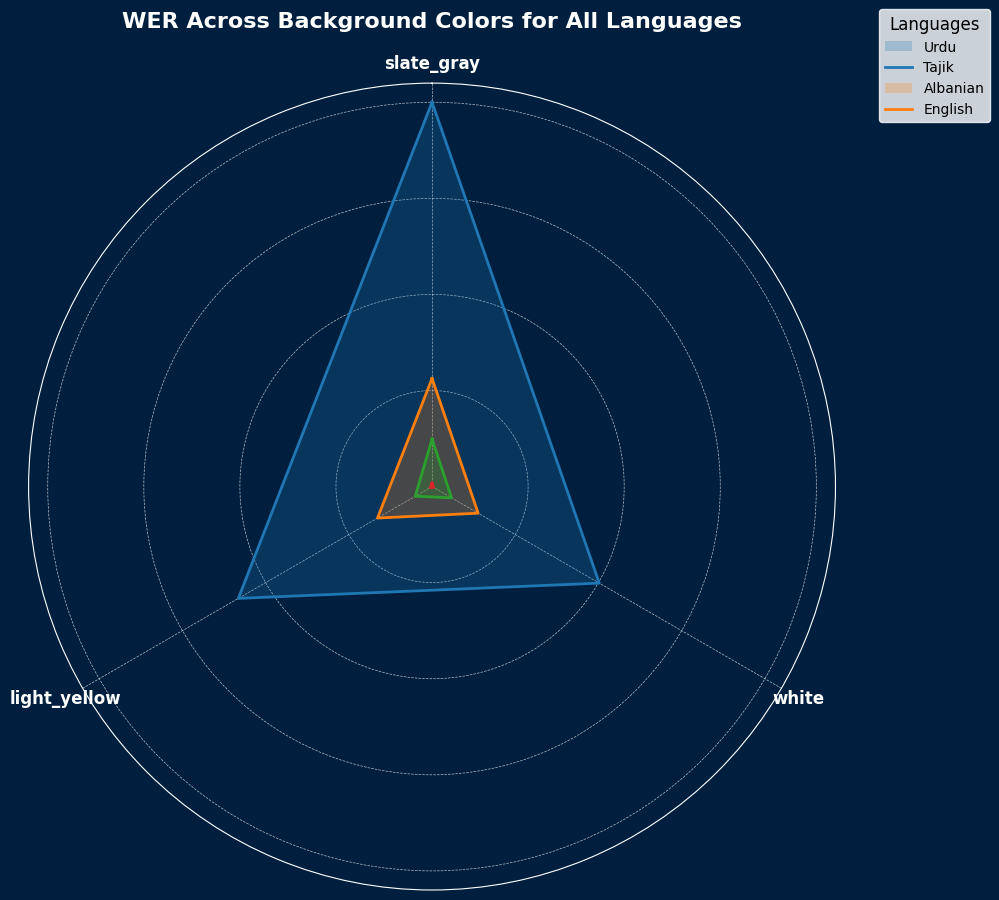

In [14]:
from math import pi
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare data for radar plot
def prepare_radar_data_bg(df, background_colors, word_count_order):
    radar_data = {}
    for language in df['Language'].unique():
        lang_data = df[df['Language'] == language]
        radar_data[language] = [lang_data[lang_data['Background Color'] == bg]['WER'].mean() for bg in background_colors]
    radar_data['Metric'] = background_colors
    return pd.DataFrame(radar_data)

# Assuming 'combined_bg_df', 'background_colors', and 'word_count_order' are defined
radar_bg_df = prepare_radar_data_bg(combined_bg_df, background_colors, word_count_order)

# Enhanced radar plot with the desired style
def plot_radar(data, title):
    categories = list(data['Metric'])
    num_vars = len(categories)

    # Create figure and axis
    fig = plt.figure(figsize=(10, 10), facecolor='#001f3f')  # Dark blue figure background
    ax = fig.add_subplot(111, polar=True)

    # Create the angle for each category
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle

    # Define colormap and transparency
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Vibrant colors
    fill_colors = [to_rgba(c, alpha=0.25) for c in colors]  # Transparent fills

    # Draw radar chart for each language
    for i, language in enumerate(data.columns[:-1]):  # Exclude 'Metric'
        values = data[language].tolist()
        values += values[:1]  # Complete the circle

        # Add transparent fill
        ax.fill(angles, values, color=fill_colors[i], edgecolor='none', zorder=2)
        # Add bold outline
        ax.plot(angles, values, linewidth=2, color=colors[i], zorder=3, label=language)

    # Add gridlines and radial settings
    ax.set_facecolor('#001f3f')  # Match axis background to the figure
    ax.grid(color='#ffffff', linestyle='--', linewidth=0.5, alpha=0.7)  # Thin white grid lines
    ax.set_theta_offset(pi / 2)  # Rotate start angle to top
    ax.set_theta_direction(-1)  # Clockwise layout

    # Configure category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, color='white', fontweight='bold')

    # Add radial lines and limits
    ax.set_yticks(np.linspace(0, max(data.iloc[:, :-1].max()), 5))
    ax.set_yticklabels([], color='white')  # Hide radial labels
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    # Add title
    ax.set_title(title, size=16, pad=20, color='white', fontweight='bold')

    # Add a legend
    ax.legend(data.columns[:-1], loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10, title="Languages",
              title_fontsize=12, facecolor='white', edgecolor='white', labelspacing=0.5)

    plt.tight_layout()
    plt.show()

# Radar plot for Background Color vs WER
plot_radar(radar_bg_df, 'WER Across Background Colors for All Languages')


## BLEU Score

In [15]:
# Function to calculate BLEU scores for background color analysis
def calculate_bleu(df):
    bleu_scores = []
    for _, row in df.iterrows():
        reference = [str(row['Gold Label']).split()]  # Tokenized reference (ground truth)
        hypothesis = str(row['Response']).split()    # Tokenized hypothesis (OCR output)
        bleu = sentence_bleu(reference, hypothesis)
        bleu_scores.append(bleu)
    df['BLEU'] = bleu_scores
    return df

# Calculate BLEU for each dataset
urdu_bleu_df = calculate_bleu(filtered_urdu_df)
english_bleu_df = calculate_bleu(filtered_english_df)
tajik_bleu_df = calculate_bleu(filtered_tajik_df)
albanian_bleu_df = calculate_bleu(filtered_albanian_df)

# Combine BLEU results for grouped analysis
bleu_combined_results = []

def append_bleu_results_bg(df, word_count_order, language_name, background_colors):
    for word_count in word_count_order:
        wc_df = df[df['Word Count Range'] == word_count]
        avg_bleu = wc_df.groupby('Background Color')['BLEU'].mean().reset_index()
        avg_bleu['Language'] = language_name
        avg_bleu['Word Count Range'] = word_count
        avg_bleu['Background Color'] = pd.Categorical(avg_bleu['Background Color'], categories=background_colors, ordered=True)
        avg_bleu = avg_bleu.sort_values('Background Color')
        bleu_combined_results.append(avg_bleu)

# Append BLEU results for all languages
append_bleu_results_bg(urdu_bleu_df, word_count_order, "Urdu", background_colors)
append_bleu_results_bg(tajik_bleu_df, word_count_order, "Tajik", background_colors)
append_bleu_results_bg(albanian_bleu_df, word_count_order, "Albanian", background_colors)
append_bleu_results_bg(english_bleu_df, word_count_order, "English", background_colors)


# Combine BLEU results into a single DataFrame
bleu_combined_df = pd.concat(bleu_combined_results, ignore_index=True)
print("Combined BLEU results DataFrame created.")


Combined BLEU results DataFrame created.


## BLEU Score Grouped Bar Plots

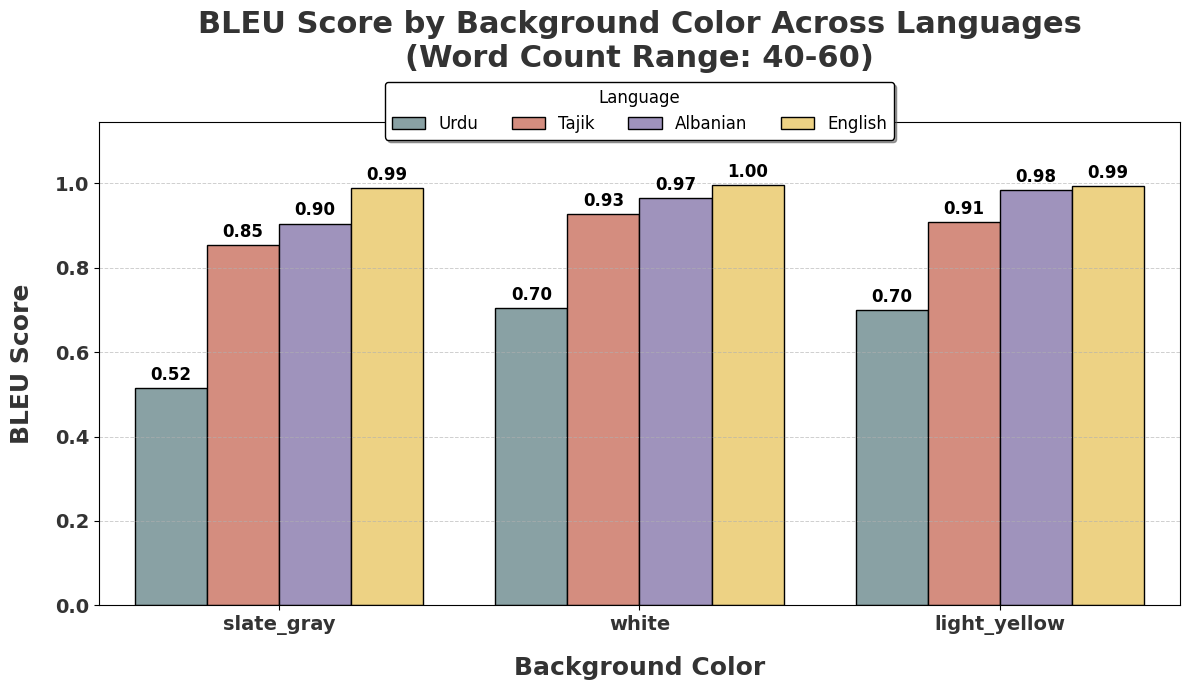

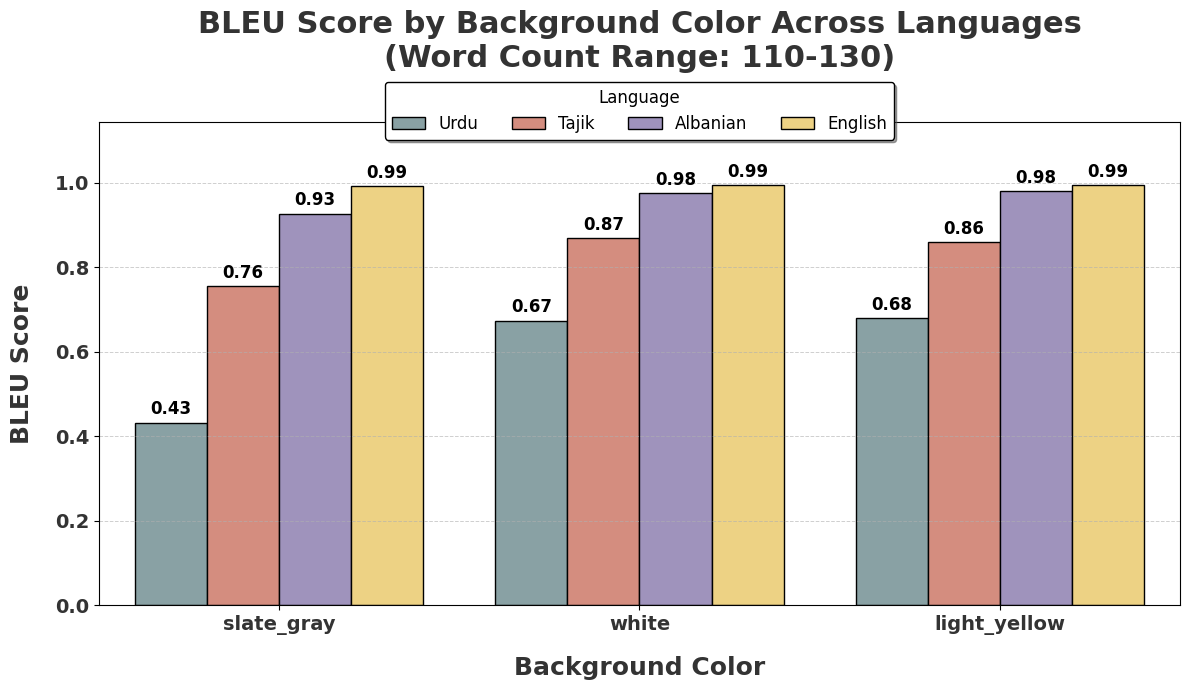

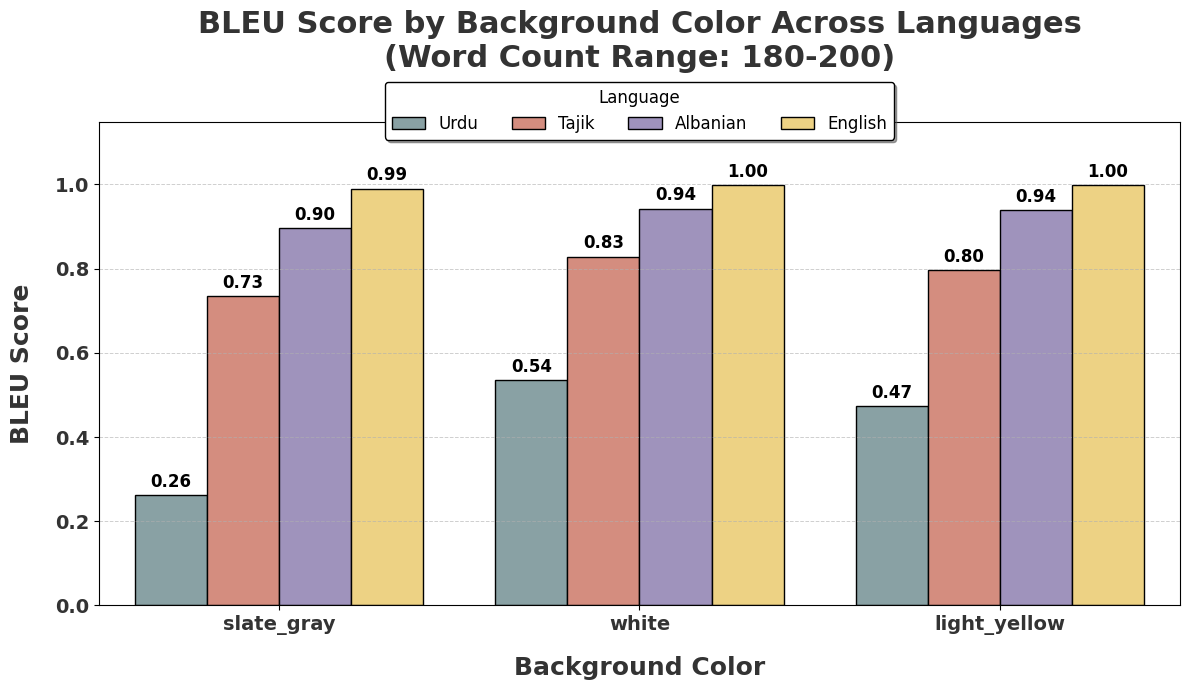

In [30]:
# Grouped Bar Plot for BLEU Score by Background Color
def plot_grouped_bar_bleu_bg(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(12, 7))

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Background Color',
            y='BLEU',
            hue='Language',
            ci=None,
            palette=['#85A5A8', '#E28371', '#9C8CC3', '#FFDA72', '#42515C'],
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'BLEU Score by Background Color Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=40,  # Increased padding to avoid overlap with legend
            color='#333333'
        )
        plt.xlabel('Background Color', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('BLEU Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend and move it below the title
        plt.legend(
        title='Language',
        title_fontsize=12,
        fontsize=12,
        loc='upper center',  # Position at the top center
        bbox_to_anchor=(0.5, 1.1),  # Slightly below the title
        frameon=True,
        facecolor='white',
        edgecolor='black',
        fancybox=True,
        shadow=True,
        ncol=4   # Arrange legend items in a single row
    )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['BLEU'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for BLEU Score
plot_grouped_bar_bleu_bg(bleu_combined_df, word_count_order)


## BLEU Score HeatMaps

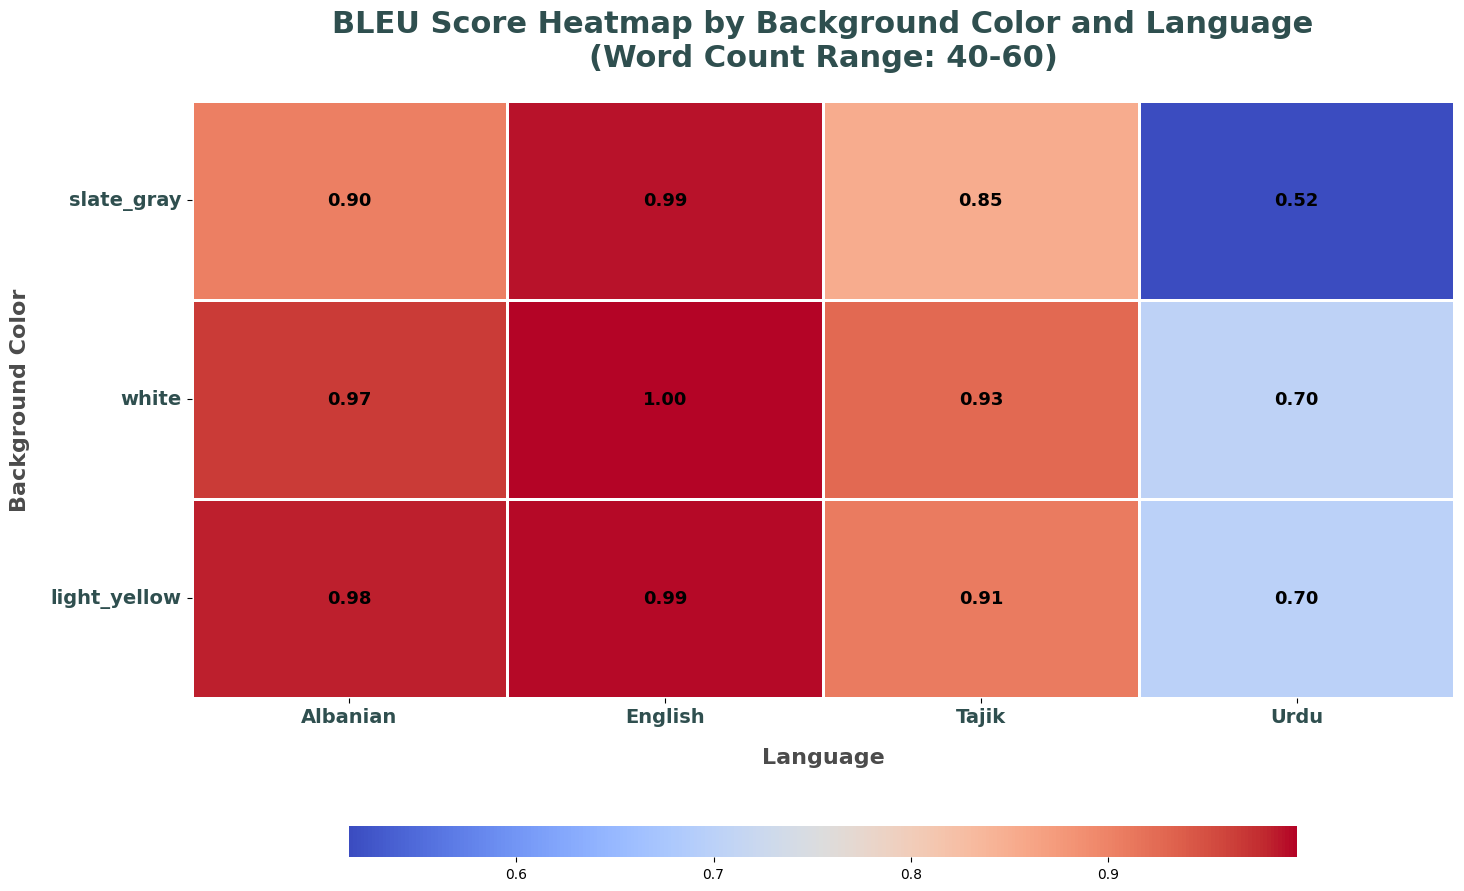

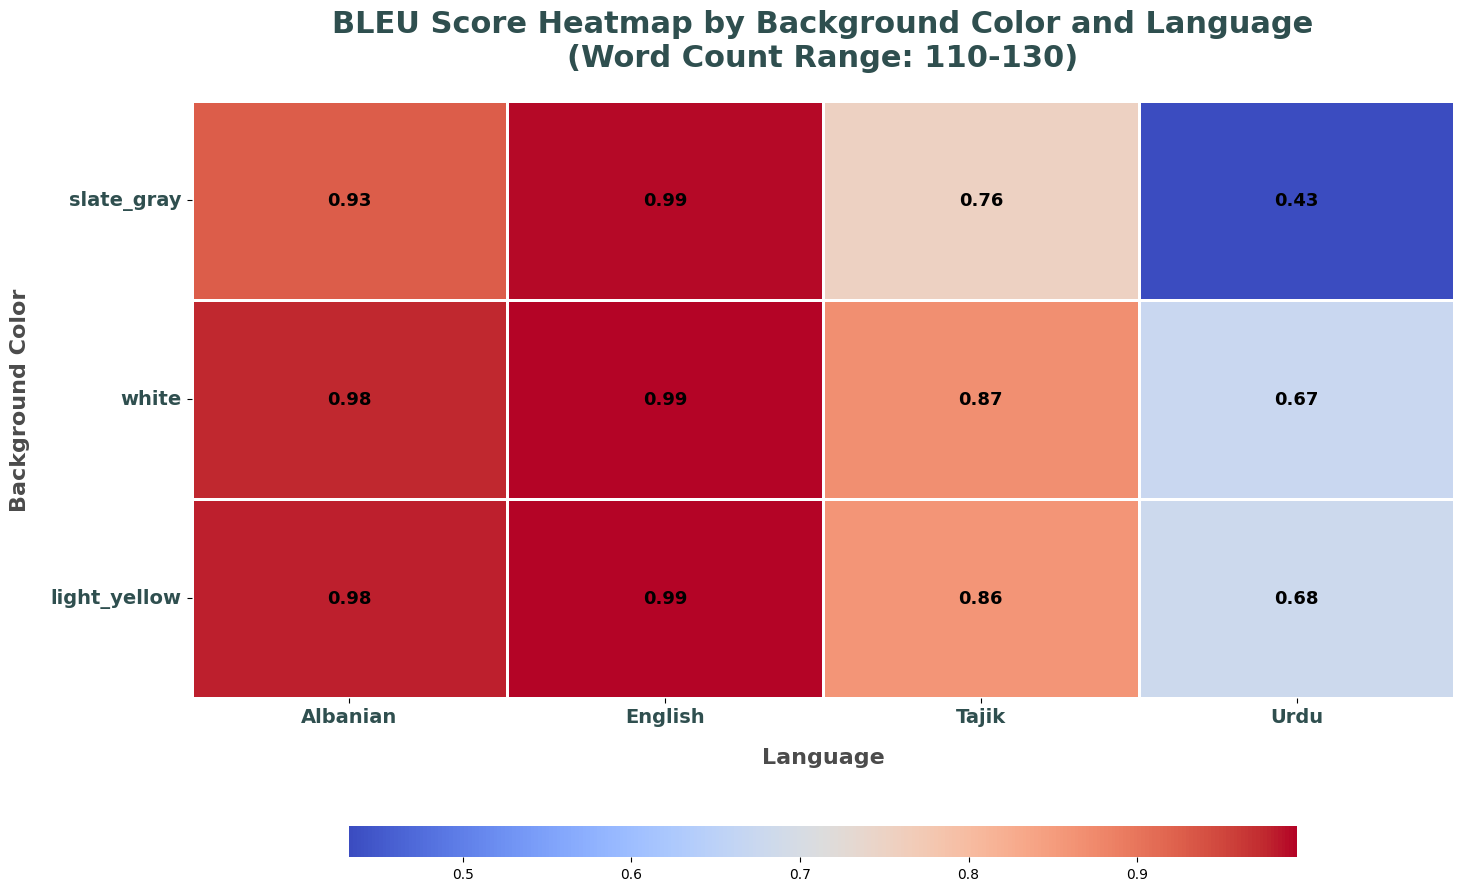

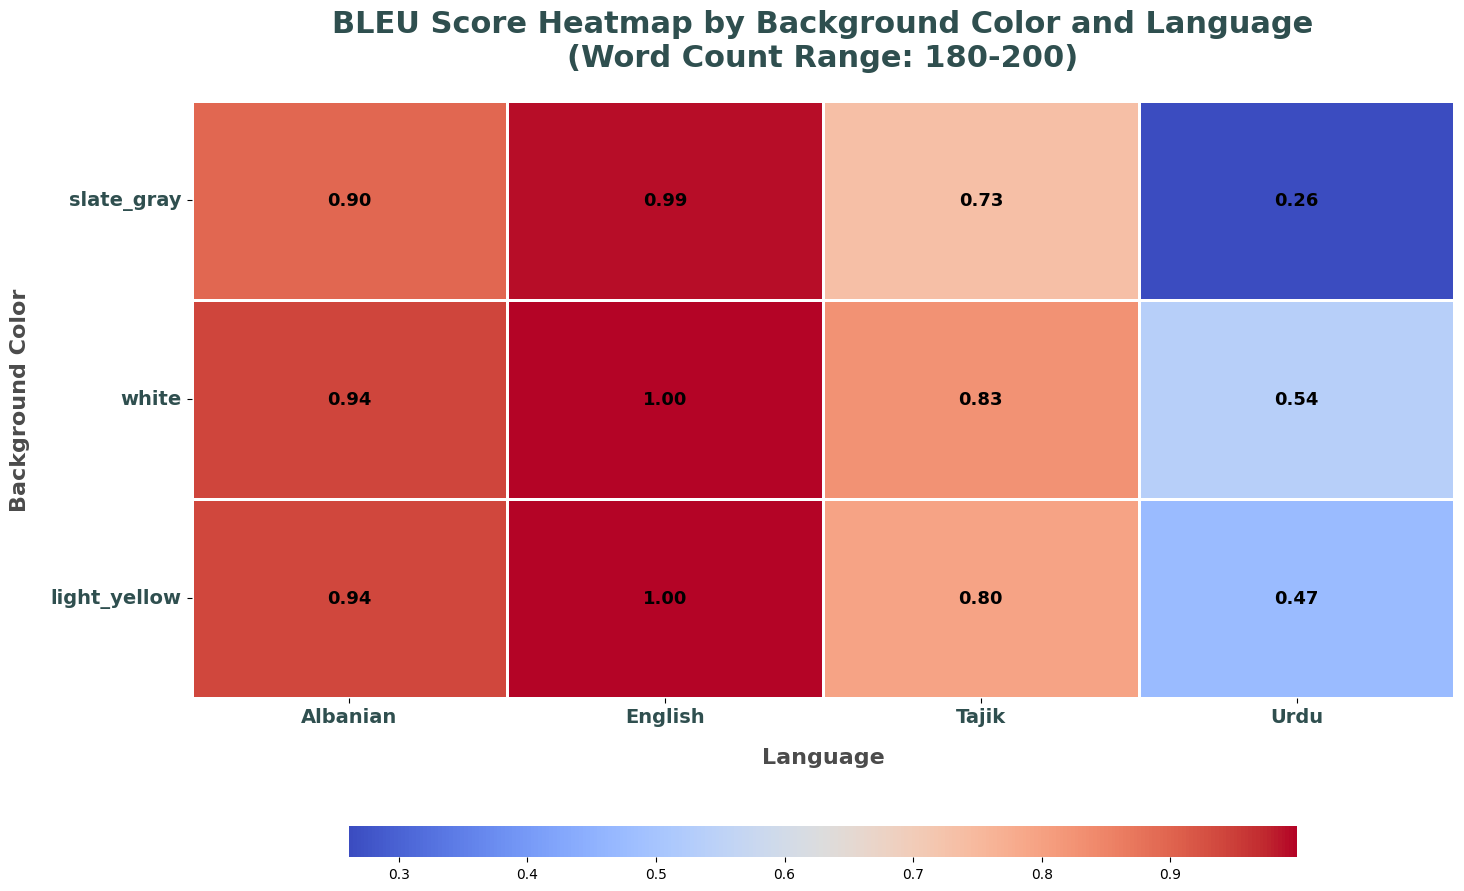

In [17]:
# Sleek Heatmaps for BLEU Scores by Background Color
def plot_heatmaps_bleu_alternative(df, word_count_order):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_bleu_combined_df = df[df['Word Count Range'] == word_count]

        # Create a pivot table for the heatmap
        heatmap_data_bleu = wc_bleu_combined_df.pivot_table(index='Background Color', columns='Language', values='BLEU')

        # Create the figure and plot heatmap
        plt.figure(figsize=(15, 10))  # Larger size for emphasis
        sns.heatmap(
            heatmap_data_bleu,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",  # Sleek, contrasting colormap
            annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
            linewidths=2,  # Thicker cell dividers
            linecolor='white',  # White gridlines for a clean appearance
            cbar_kws={
                "orientation": "horizontal",  # Horizontal color bar for a modern look
                "shrink": 0.75,
                "aspect": 30,
                "pad": 0.15,  # Adjust spacing from the plot
                "ticks": None
            }
        )

        # Add a sleek title and labels
        plt.title(
            f'BLEU Score Heatmap by Background Color and Language\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=25,
            color='#2f4f4f'  # Dark grayish-green for a modern feel
        )
        plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
        plt.ylabel('Background Color', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

        # Customize x and y ticks
        plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')  # Slight rotation for better readability
        plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

        # Adjust layout for visual balance
        plt.tight_layout(pad=2.0)
        plt.show()

# Call the function for BLEU heatmaps
plot_heatmaps_bleu_alternative(bleu_combined_df, word_count_order)


## F1 Score

In [18]:
# Function to calculate F1 scores for background color analysis
def calculate_f1_scores(df):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for _, row in df.iterrows():
        reference = str(row['Gold Label']).split()
        hypothesis = str(row['Response']).split()

        # Calculate matches and mismatches
        true_positives = len(set(reference) & set(hypothesis))
        false_positives = len(set(hypothesis) - set(reference))
        false_negatives = len(set(reference) - set(hypothesis))

        # Avoid division by zero
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Add scores to DataFrame
    df['Precision'] = precision_scores
    df['Recall'] = recall_scores
    df['F1-Score'] = f1_scores
    return df

# Calculate F1 scores for each dataset
urdu_f1_df = calculate_f1_scores(filtered_urdu_df)
english_f1_df = calculate_f1_scores(filtered_english_df)
tajik_f1_df = calculate_f1_scores(filtered_tajik_df)
albanian_f1_df = calculate_f1_scores(filtered_albanian_df)

# Combine F1-score results for grouped analysis
f1_combined_results = []

def append_f1_results_bg(df, word_count_order, language_name, background_colors):
    for word_count in word_count_order:
        wc_df = df[df['Word Count Range'] == word_count]
        avg_f1 = wc_df.groupby('Background Color')['F1-Score'].mean().reset_index()
        avg_f1['Language'] = language_name
        avg_f1['Word Count Range'] = word_count
        avg_f1['Background Color'] = pd.Categorical(avg_f1['Background Color'], categories=background_colors, ordered=True)
        avg_f1 = avg_f1.sort_values('Background Color')
        f1_combined_results.append(avg_f1)

# Append F1 results for all languages
append_f1_results_bg(urdu_f1_df, word_count_order, "Urdu", background_colors)
append_f1_results_bg(english_f1_df, word_count_order, "English", background_colors)
append_f1_results_bg(tajik_f1_df, word_count_order, "Tajik", background_colors)
append_f1_results_bg(albanian_f1_df, word_count_order, "Albanian", background_colors)

# Combine F1-score results into a single DataFrame
f1_combined_df = pd.concat(f1_combined_results, ignore_index=True)
print("Combined F1-score results DataFrame created.")


Combined F1-score results DataFrame created.


## F1 Score Grouped Bar Plots

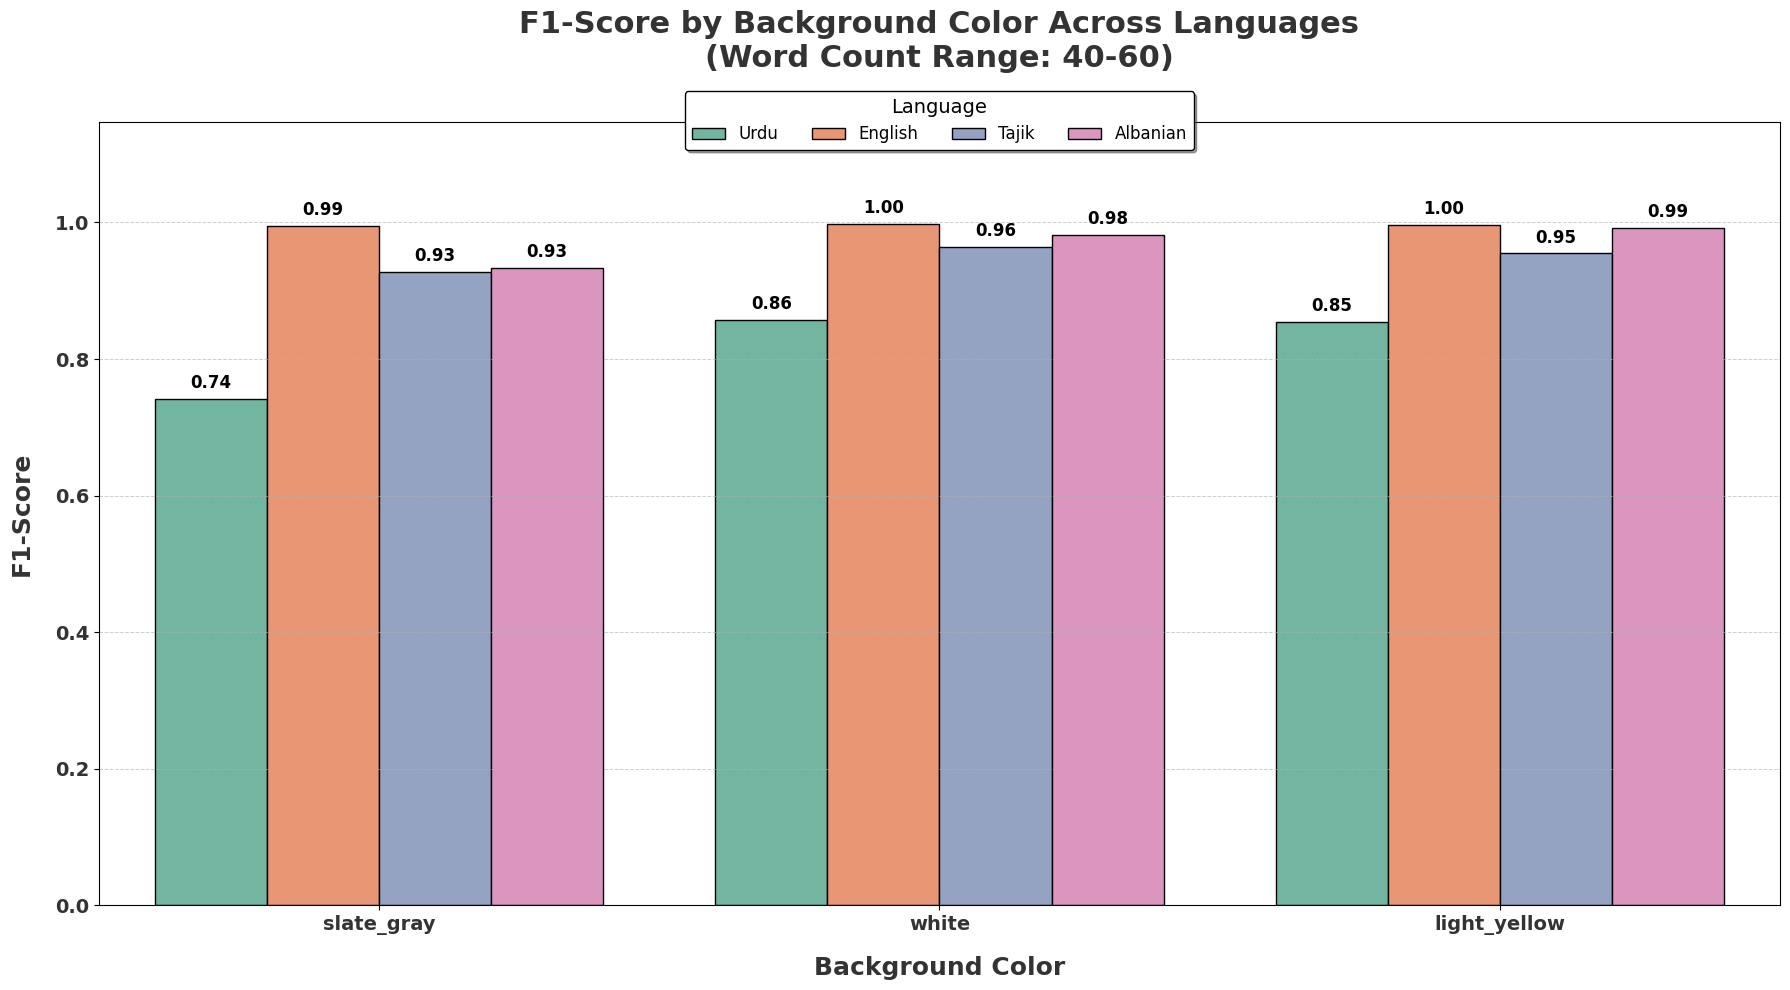

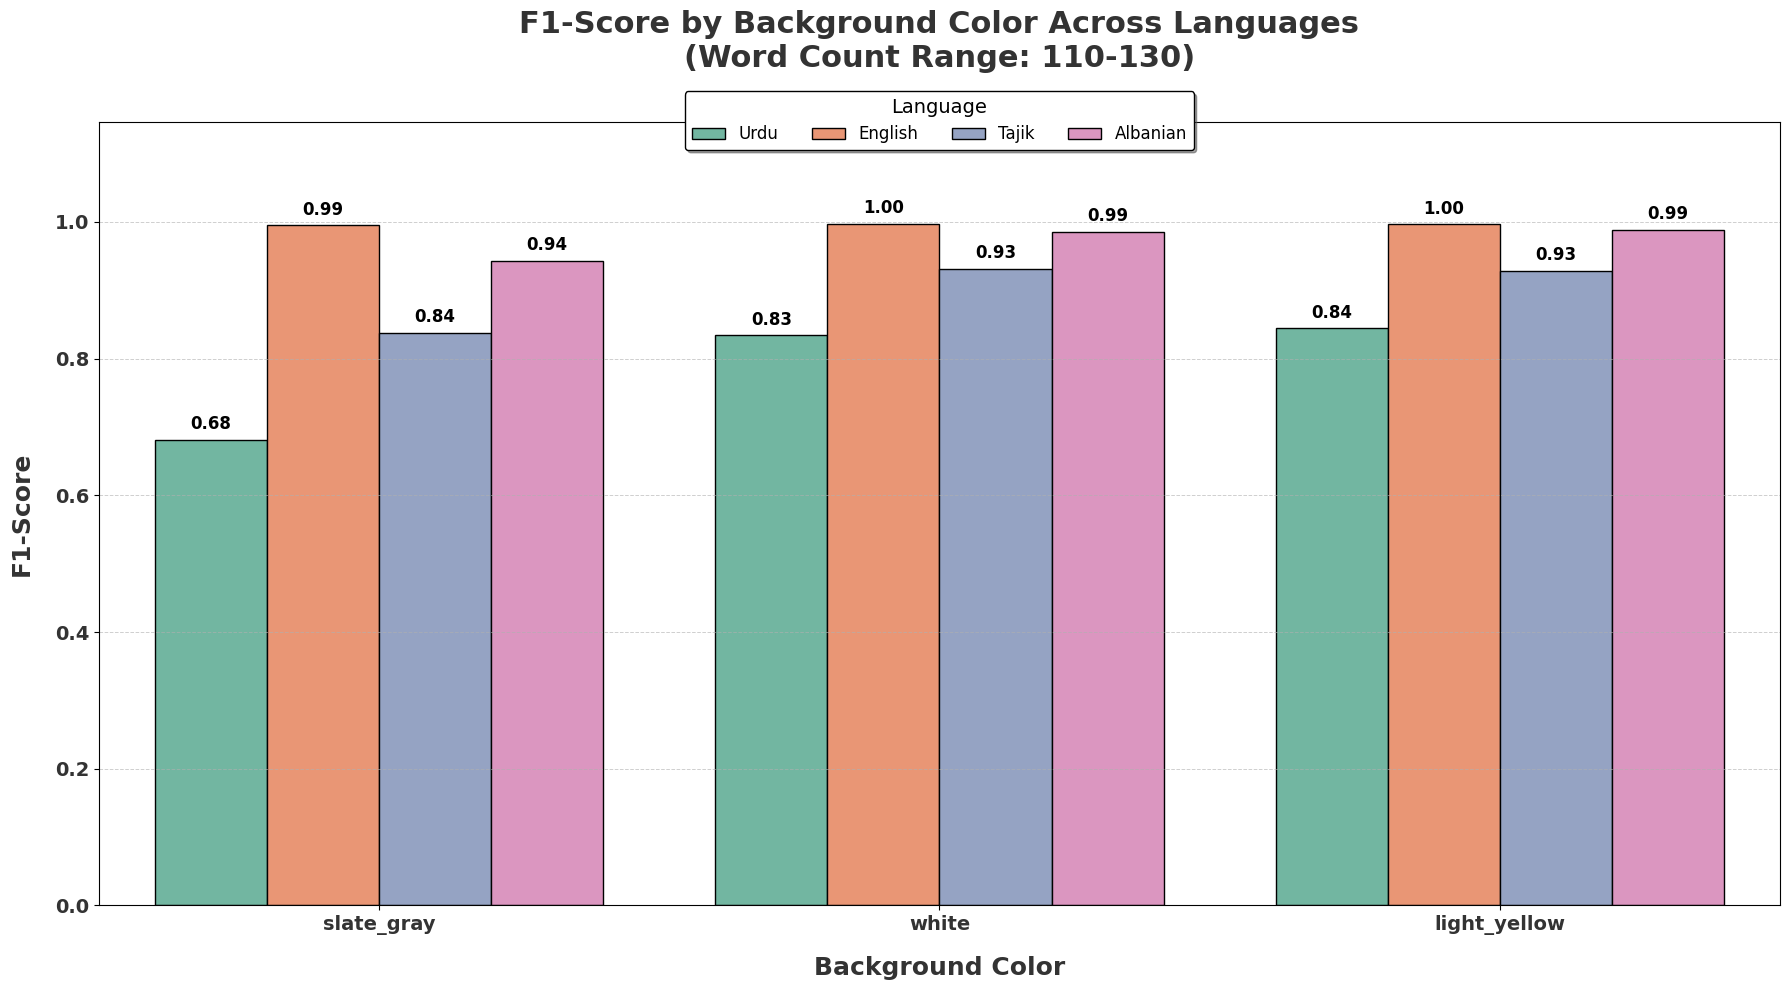

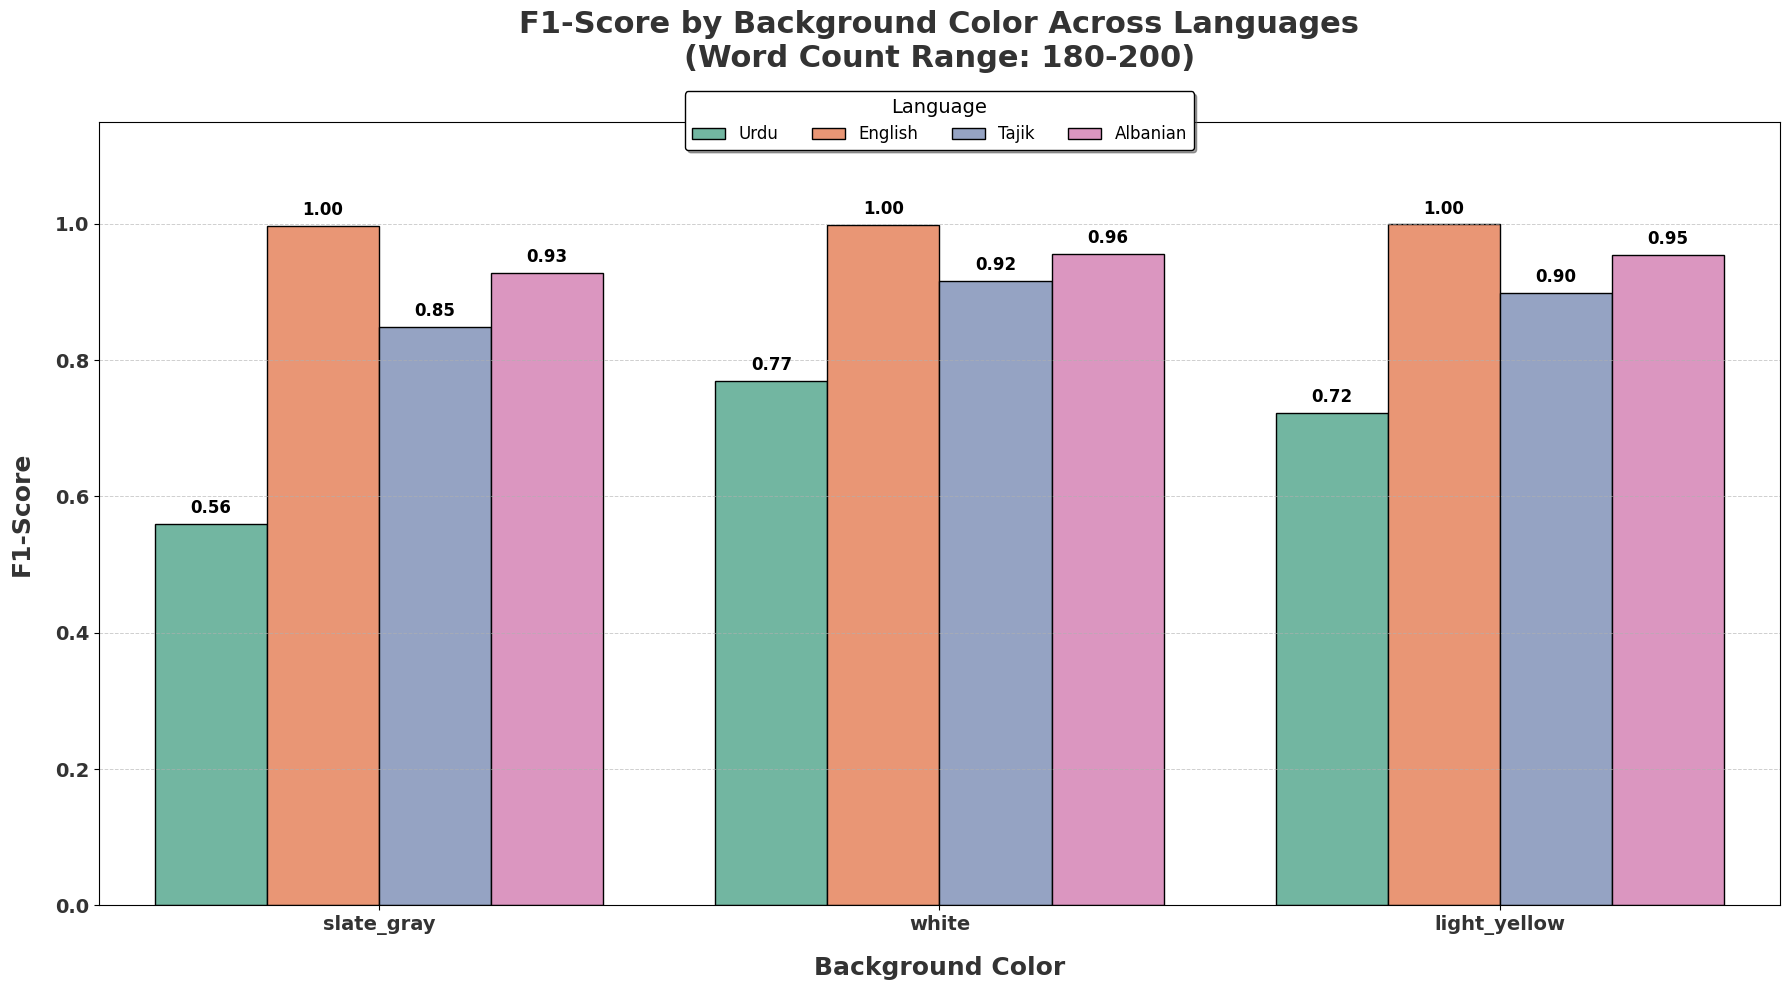

In [19]:
# Grouped Bar Plot for F1-Score by Background Color
def plot_grouped_bar_f1_bg(df, word_count_order):
    for word_count in word_count_order:
        plt.figure(figsize=(18, 10))

        # Filter data for the specific word count range
        wc_combined_df = df[df['Word Count Range'] == word_count]
        
        # Create the bar plot
        sns.barplot(
            data=wc_combined_df,
            x='Background Color',
            y='F1-Score',
            hue='Language',
            ci=None,
            palette=sns.color_palette("Set2", len(wc_combined_df['Language'].unique())),
            edgecolor='black'
        )
        
        # Add annotations above each bar
        for bar in plt.gca().patches:
            bar_height = bar.get_height()
            bar_width = bar.get_width()
            bar_x = bar.get_x()
            if bar_height > 0 and bar_width > 0:
                plt.text(
                    bar_x + bar_width / 2,
                    bar_height + 0.01,
                    f'{bar_height:.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold',
                    color='black'
                )
        
        # Customize the title and axis labels
        plt.title(
            f'F1-Score by Background Color Across Languages\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=40,  # Increased padding to avoid overlap with legend
            color='#333333'
        )
        plt.xlabel('Background Color', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        plt.ylabel('F1-Score', fontsize=18, labelpad=15, fontweight='bold', color='#333333')
        
        # Customize the legend and move it below the title
        plt.legend(
            title='Language',
            title_fontsize=14,
            fontsize=12,
            loc='upper center',  # Position legend below the title
            bbox_to_anchor=(0.5, 1.05),  # Adjust position (centered above the plot)
            frameon=True,
            facecolor='white',
            edgecolor='black',
            fancybox=True,
            shadow=True,
            ncol=len(wc_combined_df['Language'].unique())  # Arrange legend items in a single row
        )
        
        # Add gridlines with a clean look
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
        plt.xticks(fontsize=14, fontweight='bold', color='#333333')
        plt.yticks(fontsize=14, fontweight='bold', color='#333333')
        plt.ylim(0, wc_combined_df['F1-Score'].max() * 1.15)
        plt.tight_layout()
        plt.show()

# Call the function for F1-Score
plot_grouped_bar_f1_bg(f1_combined_df, word_count_order)


## F1 Score HeatMaps

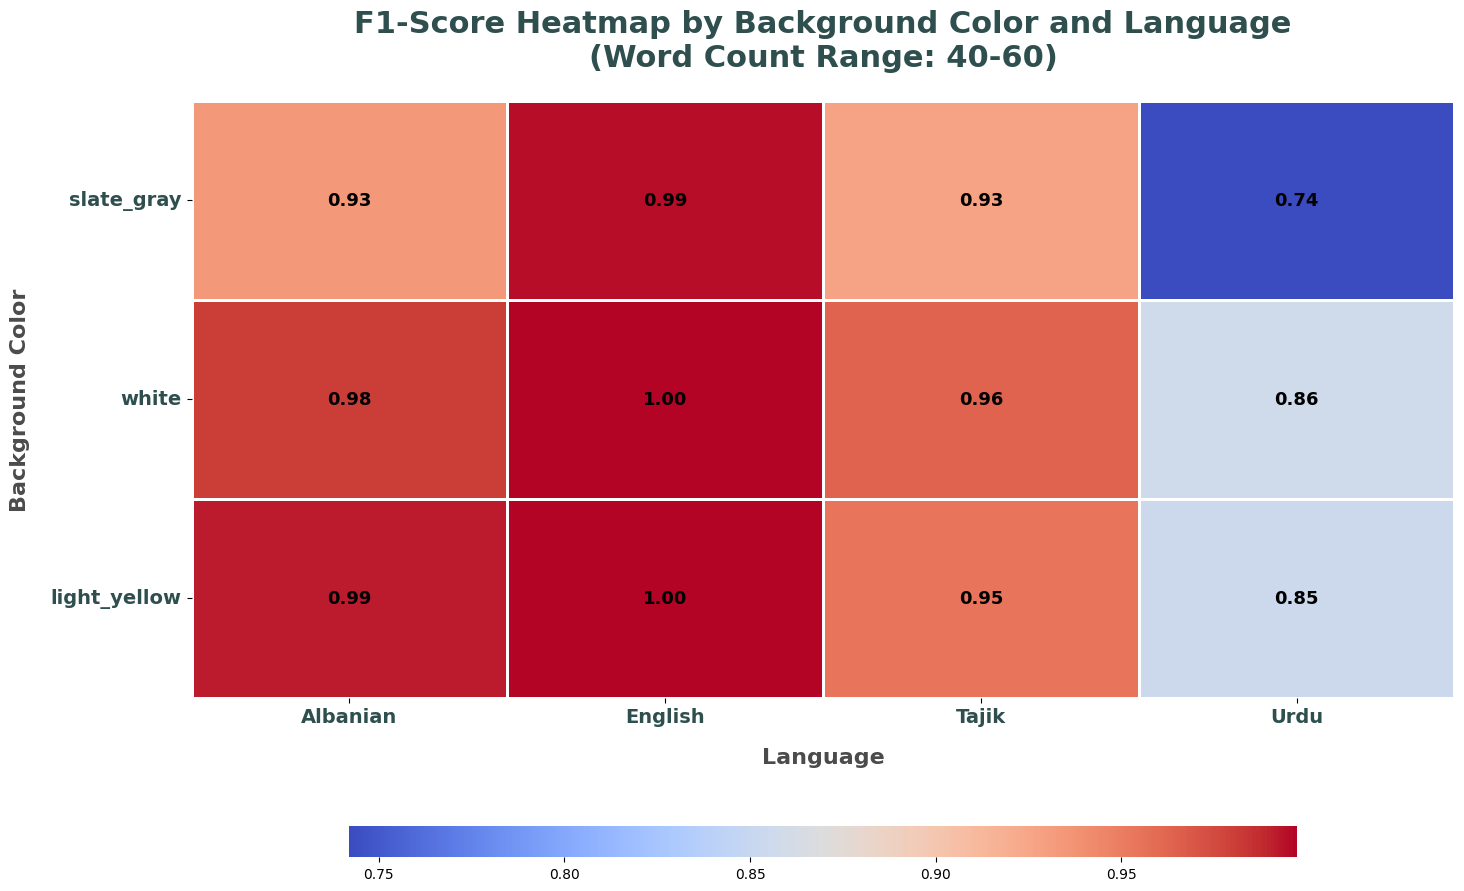

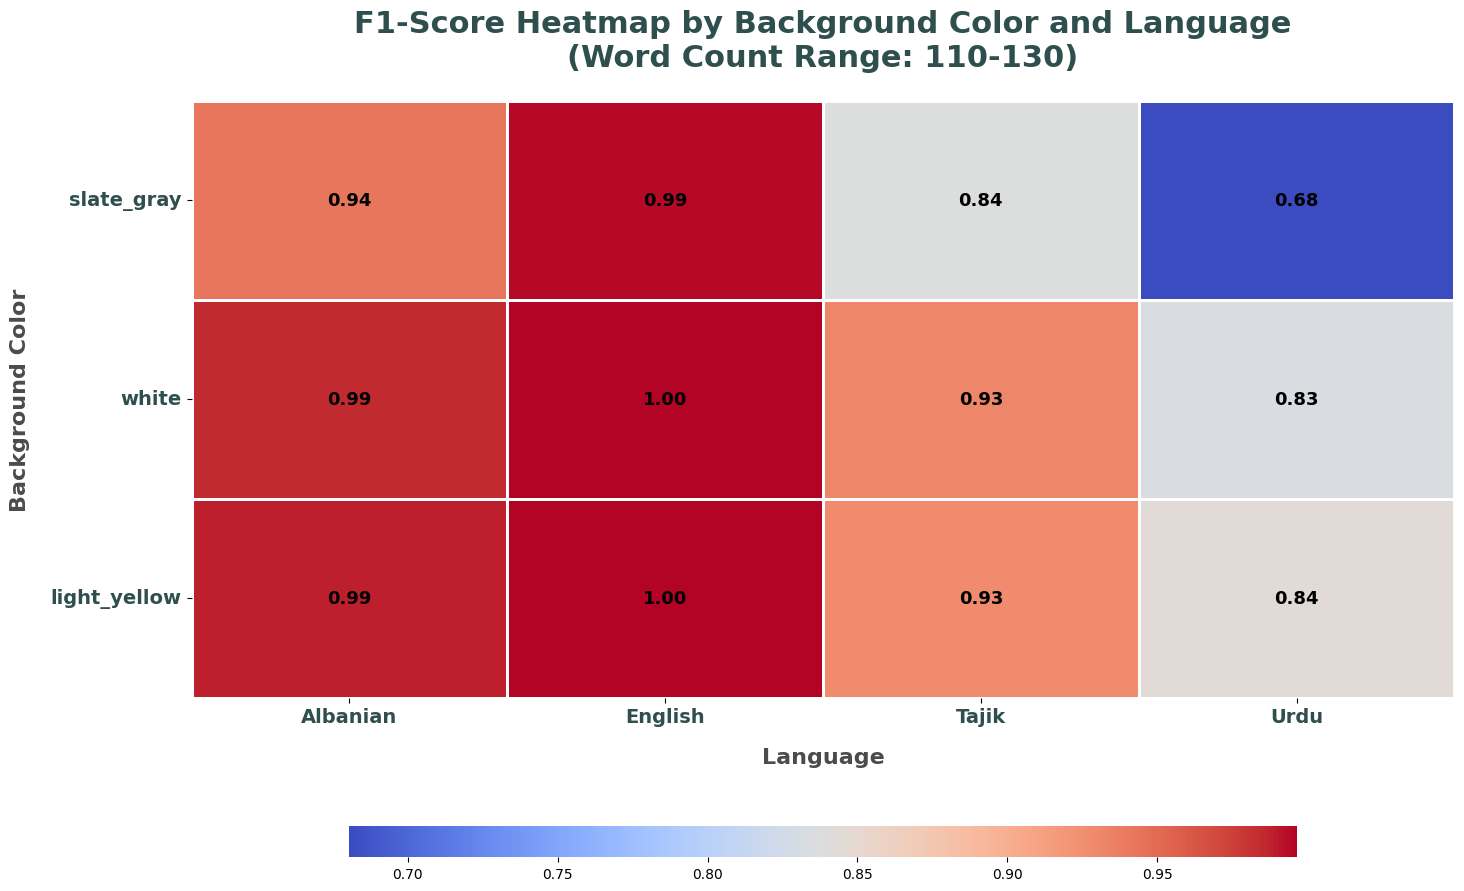

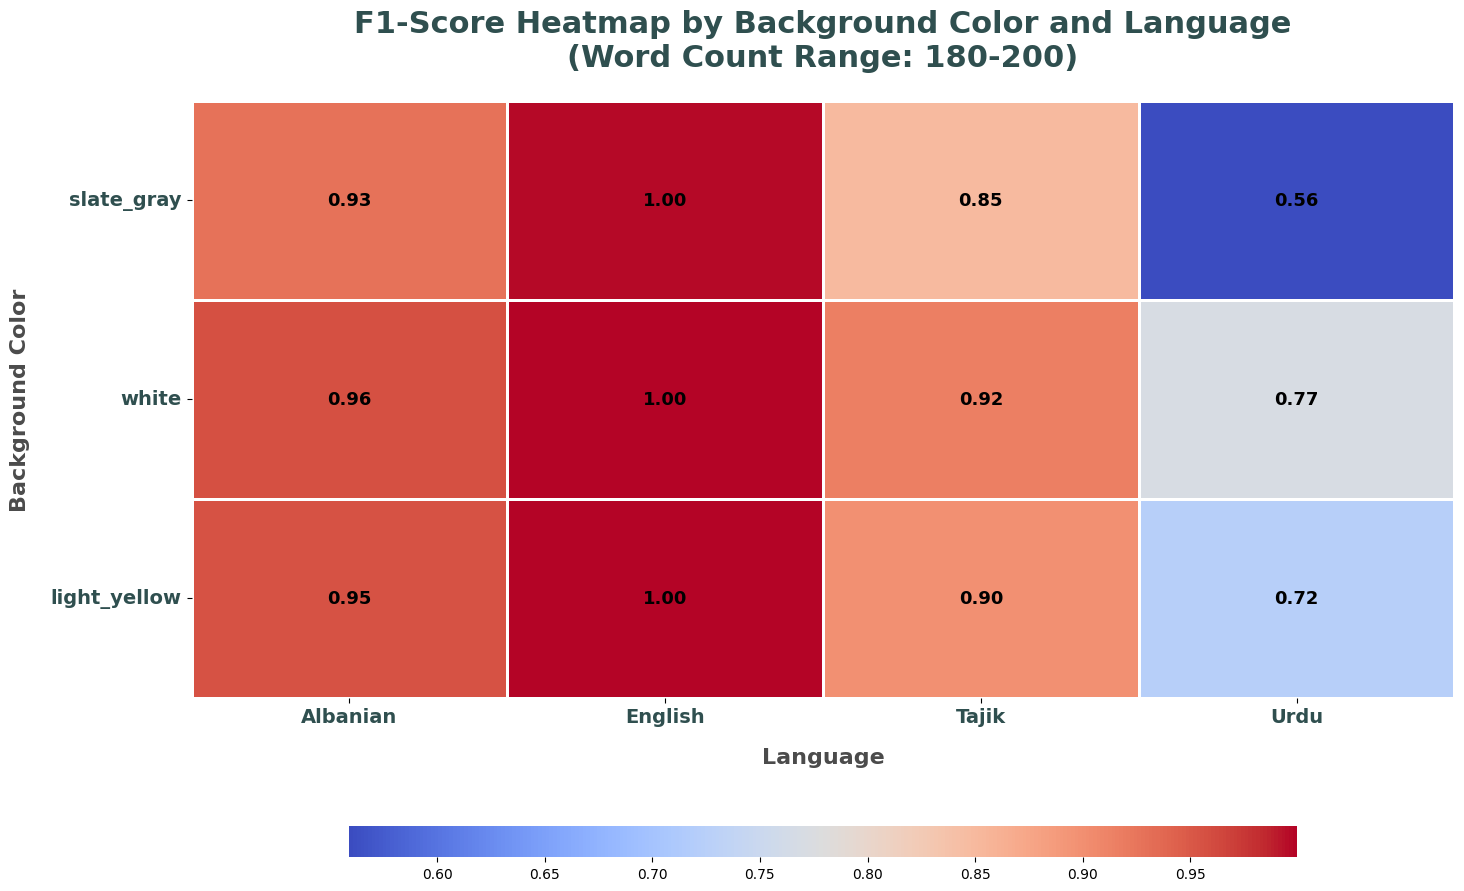

In [20]:
# Sleek Heatmaps for F1-Scores by Background Color
def plot_heatmaps_f1_alternative(df, word_count_order):
    for word_count in word_count_order:
        # Filter data for the current word count
        wc_f1_combined_df = df[df['Word Count Range'] == word_count]

        # Create a pivot table for the heatmap
        heatmap_data_f1 = wc_f1_combined_df.pivot_table(index='Background Color', columns='Language', values='F1-Score')

        # Create the figure and plot heatmap
        plt.figure(figsize=(15, 10))  # Larger size for emphasis
        sns.heatmap(
            heatmap_data_f1,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",  # Sleek, contrasting colormap
            annot_kws={"size": 13, "weight": "bold", "color": "black"},  # Styled annotations
            linewidths=2,  # Thicker cell dividers
            linecolor='white',  # White gridlines for a clean appearance
            cbar_kws={
                "orientation": "horizontal",  # Horizontal color bar for a modern look
                "shrink": 0.75,
                "aspect": 30,
                "pad": 0.15,  # Adjust spacing from the plot
                "ticks": None
            }
        )

        # Add a sleek title and labels
        plt.title(
            f'F1-Score Heatmap by Background Color and Language\n(Word Count Range: {word_count})',
            fontsize=22,
            fontweight='bold',
            pad=25,
            color='#2f4f4f'  # Dark grayish-green for a modern feel
        )
        plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')
        plt.ylabel('Background Color', fontsize=16, fontweight='bold', labelpad=15, color='#4b4b4b')

        # Customize x and y ticks
        plt.xticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')  # No rotation for clarity
        plt.yticks(fontsize=14, fontweight='bold', rotation=0, color='#2f4f4f')

        # Adjust layout for visual balance
        plt.tight_layout(pad=2.0)
        plt.show()

# Call the function for F1-Score heatmaps
plot_heatmaps_f1_alternative(f1_combined_df, word_count_order)


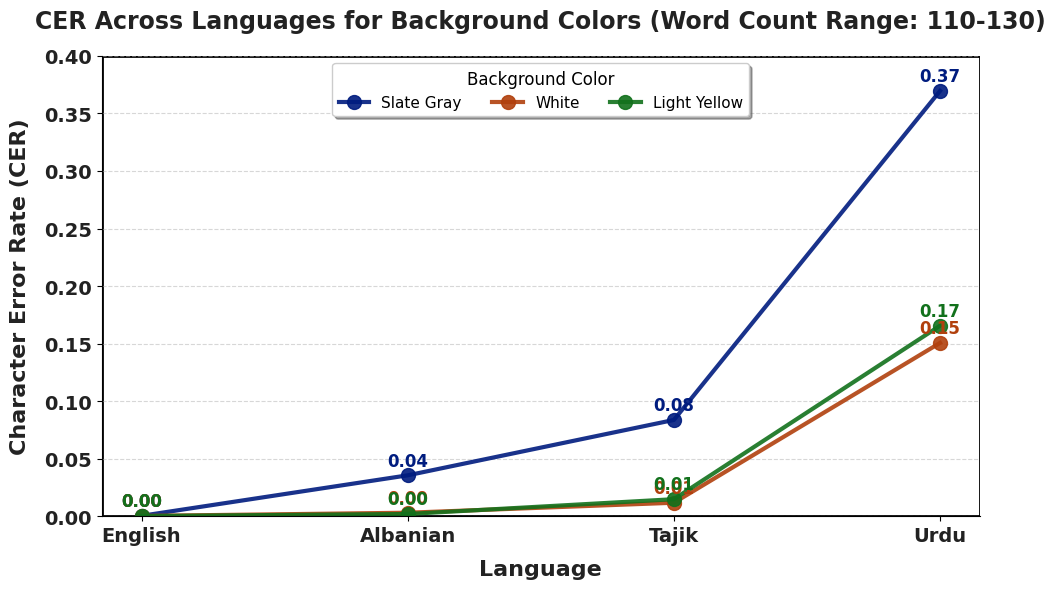

In [31]:
import matplotlib.patches as patches

# Plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility

# Add a rectangle around the entire plot
ax = plt.gca()  # Get current axis
rect = patches.Rectangle(
    (0, 0), 1, 1,  # (x, y) position and width, height will be normalized
    transform=ax.transAxes,  # Transform to match the axes coordinates
    color='black',           # Outline color
    linewidth=2,             # Thickness of the box outline
    fill=False               # Set to False to create only the outline
)
ax.add_patch(rect)

# Plot each background color as a separate line
for idx, bg_color in enumerate(bg_color_order):
    bg_df = filtered_bg_cer_df_specific[filtered_bg_cer_df_specific['Background Color'] == bg_color]
    plt.plot(
        bg_df['Language'], 
        bg_df['CER'], 
        label=f'{bg_color.replace("_", " ").title()}',
        marker='o',
        linewidth=3,
        markersize=10,
        color=custom_palette[idx],
        alpha=0.9
    )
    
    # Annotate values on the lines with a small offset
    for x, y in zip(bg_df['Language'], bg_df['CER']):
        plt.text(
            x, y + 0.005, f'{y:.2f}', 
            ha='center', va='bottom',
            fontsize=12, fontweight='bold',
            color=custom_palette[idx]
        )

# Customize the plot aesthetics
plt.title(
    'CER Across Languages for Background Colors (Word Count Range: 110-130)',
    fontsize=17, fontweight='bold', pad=20, color="#222222"
)
plt.xlabel('Language', fontsize=16, fontweight='bold', labelpad=10, color="#222222")
plt.ylabel('Character Error Rate (CER)', fontsize=16, fontweight='bold', labelpad=10, color="#222222")
plt.xticks(fontsize=14, fontweight='bold', color="#222222")
plt.yticks(fontsize=14, fontweight='bold', color="#222222")
plt.ylim(0, 0.40)  # Set y-axis scale max to 0.40
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()

# Add a legend below the plot
plt.legend(
    title="Background Color",
    title_fontsize=12,
    fontsize=11,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.0),  # Centered below the plot
    ncol=3,
    fancybox=True,
    shadow=True
)

plt.tight_layout()
plt.show()
